# TSPÁÆóÊ≥ïÁªºÂêàÂØπÊØîÂàÜÊûêÔºöÂåó‰∫¨Â§ßÂ≠¶Ê†°Âõ≠Ë∑ØÂæÑËßÑÂàí

Êú¨notebookÂØπÂÖ≠ÁßçTSPÊ±ÇËß£ÁÆóÊ≥ïËøõË°åÂÖ¨Âπ≥„ÄÅÁ≥ªÁªüÁöÑÂØπÊØîÂàÜÊûêÔºö

1. **ÈöèÊú∫Ë∑ØÂæÑÁÆóÊ≥ï** (Random Path - Baseline)
2. **‰º†ÁªüËöÅÁæ§‰ºòÂåñÁÆóÊ≥ï** (Traditional ACO)
3. **ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñÁÆóÊ≥ï** (Heterogeneous ACO)  
4. **ÈÅó‰º†ÁÆóÊ≥ï** (Genetic Algorithm)
5. **Ê®°ÊãüÈÄÄÁÅ´ÁÆóÊ≥ï** (Simulated Annealing)
6. **Ë¥™ÂøÉÁÆóÊ≥ï** (Greedy Algorithm)

## üìä ÂØπÊØîÁª¥Â∫¶
- **Ëß£Ë¥®Èáè**: ÊúÄÁü≠Ë∑ØÂæÑË∑ùÁ¶ª„ÄÅÁ®≥ÂÆöÊÄß
- **ËÆ°ÁÆóÊïàÁéá**: ÊâßË°åÊó∂Èó¥„ÄÅÊî∂ÊïõÈÄüÂ∫¶
- **ÁÆóÊ≥ïÁâπÊÄß**: ÂèÇÊï∞ÊïèÊÑüÊÄß„ÄÅÈÄÇÁî®Âú∫ÊôØ
- **Âü∫Á∫øÂØπÊØî**: Áõ∏ÂØπ‰∫éÈöèÊú∫baselineÁöÑÊîπËøõÁ®ãÂ∫¶
- **ÁªüËÆ°ÂàÜÊûê**: Â§öÊ¨°ËøêË°åÁöÑÁªüËÆ°ÊòæËëóÊÄßÊ£ÄÈ™å

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import time
import math
import pandas as pd
import seaborn as sns
from copy import deepcopy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8')

# ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠êÁ°Æ‰øùÁªìÊûúÂèØÂ§çÁé∞
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

# Matplotlib ‰∏≠ÊñáÊòæÁ§∫ËÆæÁΩÆ
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# Âú∞ÂõæÊñá‰ª∂Ë∑ØÂæÑ
MAP_IMAGE_PATH = 'map_1.0.jpg'

# Âåó‰∫¨Â§ßÂ≠¶Âú∞ÁÇπÂùêÊ†á
CITIES = {
    "West Gate": (703, 595),
    "Weiming Lake": (1069, 630), 
    "Jing Yuan": (928, 830),
    "Boya Tower": (1148, 646),
    "Statue of the Former Principal Cai Yuanpei": (885, 632),
    "Zhibeizi Garden": (1320, 1052),
    "YANNANYUAN": (969, 991),
    "May 4th Playground": (1251, 1147),
    "University Library": (1083, 816),
    "Stone Fish": (959, 632),
    "Tomb of Mr. Edgar Snow": (1070, 730),
    "Marble Boat": (1040, 571),
    "Luce Pavilion": (1012, 582),
    "Tian Yuan": (1314, 670),
    "MINGHE YUAN": (733, 518),
    "Campus Scenery Pavilion": (840, 470),
    "LANGRUN YUAN": (1134, 271),
    "JINGCHUN YUAN": (945, 455),
    "Lotus Pond": (750, 432),
    "SHAO HAI": (736, 742),
    "Catering Building": (939, 1111),
    "Humanities Garden": (1155, 433),
    "Statue of Professor Li Dazhao": (926, 738),
    "Museum of University History": (785,713),
    "University Hall": (1098, 992),
    "North Shore": (1049, 519),
    "The Bridge of Magpies": (993, 559),
    "Silent Wall": (1118, 503),
    "Fountain": (878, 1062),
    "Red Lake": (864, 419),
    "The Institute of Poetry Studies": (993, 358),
    "Tan Siu Lin Center for International Studies": (1080, 697)
}

# ËΩ¨Êç¢‰∏∫Êï∞ÁªÑÊ†ºÂºè‰æø‰∫éËÆ°ÁÆó
city_names = list(CITIES.keys())
city_coords = np.array(list(CITIES.values()))
num_cities = len(CITIES)

print(f"Âåó‰∫¨Â§ßÂ≠¶Ê†°Âõ≠Âú∞ÁÇπÊÄªÊï∞: {num_cities}")
print(f"ÊµãËØïÊï∞ÊçÆËßÑÊ®°: {num_cities}‰∏™ÂüéÂ∏ÇÁöÑTSPÈóÆÈ¢ò")
print("="*80)

Âåó‰∫¨Â§ßÂ≠¶Ê†°Âõ≠Âú∞ÁÇπÊÄªÊï∞: 32
ÊµãËØïÊï∞ÊçÆËßÑÊ®°: 32‰∏™ÂüéÂ∏ÇÁöÑTSPÈóÆÈ¢ò


## üßÆ ÂÖ¨ÂÖ±Â∑•ÂÖ∑ÂáΩÊï∞ÂÆö‰πâ

In [5]:
def calculate_distance_matrix(coords):
    """ËÆ°ÁÆóÂüéÂ∏ÇÈó¥ÁöÑÊ¨ßÂá†ÈáåÂæóË∑ùÁ¶ªÁü©Èòµ"""
    n = len(coords)
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                distances[i][j] = np.sqrt((coords[i][0] - coords[j][0])**2 + 
                                        (coords[i][1] - coords[j][1])**2)
    return distances

def calculate_path_distance(path, distance_matrix):
    """ËÆ°ÁÆóÁªôÂÆöË∑ØÂæÑÁöÑÊÄªË∑ùÁ¶ª"""
    total_distance = 0
    for i in range(len(path)):
        current_city = path[i]
        next_city = path[(i + 1) % len(path)]
        total_distance += distance_matrix[current_city][next_city]
    return total_distance

def plot_path(path, title, algorithm_name, distance):
    """ÁªòÂà∂Ë∑ØÂæÑÂèØËßÜÂåñÂõæ"""
    plt.figure(figsize=(12, 8))
    
    # ÁªòÂà∂Âú∞ÂõæËÉåÊôØ
    try:
        campus_map = mpimg.imread(MAP_IMAGE_PATH)
        plt.imshow(campus_map, extent=[0, campus_map.shape[1], campus_map.shape[0], 0])
    except FileNotFoundError:
        print(f"Ë≠¶Âëä: Âú∞ÂõæÊñá‰ª∂ '{MAP_IMAGE_PATH}' Êú™ÊâæÂà∞")
        plt.xlim(0, 1500)
        plt.ylim(0, 1200)
        plt.gca().invert_yaxis()
    
    # ÁªòÂà∂Ë∑ØÂæÑ
    path_coords = city_coords[path + [path[0]]]
    plt.plot(path_coords[:, 0], path_coords[:, 1], 'r-', linewidth=3, alpha=0.8)
    
    # ÁªòÂà∂ÂüéÂ∏ÇÁÇπ
    plt.scatter(city_coords[:, 0], city_coords[:, 1], 
               c='blue', s=80, zorder=5, alpha=0.7, edgecolors='white', linewidth=1)
    
    # Á™ÅÂá∫ÊòæÁ§∫Ëµ∑ÁÇπ
    start_coord = city_coords[path[0]]
    plt.scatter(start_coord[0], start_coord[1], c='green', s=150, marker='s', 
               zorder=6, edgecolors='white', linewidth=2)
    
    plt.title(f'{title}\n{algorithm_name} | Ë∑ØÂæÑË∑ùÁ¶ª: {distance:.2f}', fontsize=14, fontweight='bold')
    plt.xlabel('XÂùêÊ†á')
    plt.ylabel('YÂùêÊ†á')
    plt.tight_layout()
    return plt.gcf()

# ËÆ°ÁÆóË∑ùÁ¶ªÁü©Èòµ
distance_matrix = calculate_distance_matrix(city_coords)
print("Ë∑ùÁ¶ªÁü©ÈòµËÆ°ÁÆóÂÆåÊàê")
print(f"Ë∑ùÁ¶ªÁü©ÈòµÂ§ßÂ∞è: {distance_matrix.shape}")

Ë∑ùÁ¶ªÁü©ÈòµËÆ°ÁÆóÂÆåÊàê
Ë∑ùÁ¶ªÁü©ÈòµÂ§ßÂ∞è: (32, 32)


## üêú ‰º†ÁªüËöÅÁæ§‰ºòÂåñÁÆóÊ≥ïÂÆûÁé∞

In [6]:
class TraditionalACO:
    def __init__(self, distance_matrix, n_ants=30, n_iterations=100, 
                 alpha=1.0, beta=2.0, rho=0.5, Q=100):
        self.distance_matrix = distance_matrix
        self.n_cities = len(distance_matrix)
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.alpha = alpha  # ‰ø°ÊÅØÁ¥†ÈáçË¶ÅÁ®ãÂ∫¶
        self.beta = beta    # ÂêØÂèëÂºèÂõ†Â≠êÈáçË¶ÅÁ®ãÂ∫¶
        self.rho = rho      # ‰ø°ÊÅØÁ¥†Êå•ÂèëÁ≥ªÊï∞
        self.Q = Q          # ‰ø°ÊÅØÁ¥†Âº∫Â∫¶
        
        # ÂàùÂßãÂåñ‰ø°ÊÅØÁ¥†Áü©Èòµ
        self.pheromone = np.ones((self.n_cities, self.n_cities))
        
        # ÂêØÂèëÂºè‰ø°ÊÅØÁü©ÈòµÔºàË∑ùÁ¶ªÂÄíÊï∞Ôºâ
        self.eta = np.zeros((self.n_cities, self.n_cities))
        for i in range(self.n_cities):
            for j in range(self.n_cities):
                if i != j:
                    self.eta[i][j] = 1.0 / self.distance_matrix[i][j]
    
    def select_next_city(self, current_city, unvisited):
        """Ê†πÊçÆÊ¶ÇÁéáÈÄâÊã©‰∏ã‰∏Ä‰∏™ÂüéÂ∏Ç"""
        if not unvisited:
            return None
            
        probabilities = []
        for city in unvisited:
            pheromone_val = self.pheromone[current_city][city] ** self.alpha
            heuristic_val = self.eta[current_city][city] ** self.beta
            probabilities.append(pheromone_val * heuristic_val)
        
        probabilities = np.array(probabilities)
        probabilities = probabilities / probabilities.sum()
        
        # ËΩÆÁõòËµåÈÄâÊã©
        rand = random.random()
        cumulative_prob = 0
        for i, prob in enumerate(probabilities):
            cumulative_prob += prob
            if rand <= cumulative_prob:
                return unvisited[i]
        return unvisited[-1]
    
    def construct_solution(self, start_city=0):
        """ÊûÑÈÄ†‰∏Ä‰∏™Ëß£"""
        path = [start_city]
        unvisited = list(range(self.n_cities))
        unvisited.remove(start_city)
        
        current_city = start_city
        while unvisited:
            next_city = self.select_next_city(current_city, unvisited)
            path.append(next_city)
            unvisited.remove(next_city)
            current_city = next_city
            
        return path
    
    def update_pheromone(self, all_paths, all_distances):
        """Êõ¥Êñ∞‰ø°ÊÅØÁ¥†"""
        # ‰ø°ÊÅØÁ¥†Êå•Âèë
        self.pheromone *= (1 - self.rho)
        
        # Ê∑ªÂä†Êñ∞‰ø°ÊÅØÁ¥†
        for path, distance in zip(all_paths, all_distances):
            pheromone_to_add = self.Q / distance
            for i in range(len(path)):
                current_city = path[i]
                next_city = path[(i + 1) % len(path)]
                self.pheromone[current_city][next_city] += pheromone_to_add
                self.pheromone[next_city][current_city] += pheromone_to_add
    
    def solve(self, start_city=0, verbose=False):
        """Ê±ÇËß£TSP"""
        best_path = None
        best_distance = float('inf')
        
        for iteration in range(self.n_iterations):
            # ÊâÄÊúâËöÇËöÅÊûÑÈÄ†Ëß£
            all_paths = []
            all_distances = []
            
            for ant in range(self.n_ants):
                path = self.construct_solution(start_city)
                distance = calculate_path_distance(path, self.distance_matrix)
                all_paths.append(path)
                all_distances.append(distance)
                
                if distance < best_distance:
                    best_distance = distance
                    best_path = path.copy()
            
            # Êõ¥Êñ∞‰ø°ÊÅØÁ¥†
            self.update_pheromone(all_paths, all_distances)
            
            if verbose and iteration % 20 == 0:
                print(f"Ëø≠‰ª£ {iteration}: ÊúÄ‰Ω≥Ë∑ùÁ¶ª = {best_distance:.2f}")
        
        return best_path, best_distance

print("‰º†ÁªüËöÅÁæ§‰ºòÂåñÁÆóÊ≥ïÂÆûÁé∞ÂÆåÊàê")

‰º†ÁªüËöÅÁæ§‰ºòÂåñÁÆóÊ≥ïÂÆûÁé∞ÂÆåÊàê


## üêúüêú ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñÁÆóÊ≥ïÂÆûÁé∞

In [7]:
class HeterogeneousACO:
    def __init__(self, distance_matrix, n_scout_ants=15, n_forager_ants=15, 
                 n_iterations=100, alpha=1.0, beta=2.0, rho=0.5, Q=100):
        self.distance_matrix = distance_matrix
        self.n_cities = len(distance_matrix)
        self.n_scout_ants = n_scout_ants
        self.n_forager_ants = n_forager_ants
        self.n_total_ants = n_scout_ants + n_forager_ants
        self.n_iterations = n_iterations
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.Q = Q
        
        # ÂàùÂßãÂåñ‰ø°ÊÅØÁ¥†Áü©Èòµ
        self.pheromone = np.ones((self.n_cities, self.n_cities))
        
        # ÂêØÂèëÂºè‰ø°ÊÅØÁü©Èòµ
        self.eta = np.zeros((self.n_cities, self.n_cities))
        for i in range(self.n_cities):
            for j in range(self.n_cities):
                if i != j:
                    self.eta[i][j] = 1.0 / self.distance_matrix[i][j]
        
        # ËöÇËöÅÂìçÂ∫îÈòàÂÄºÔºàÁî®‰∫éËßíËâ≤ÂàÜÈÖçÔºâ
        self.response_thresholds = np.random.uniform(0.3, 0.7, self.n_total_ants)
    
    def select_next_city_scout(self, current_city, unvisited):
        """‰æ¶ÂØüËöÅÁöÑÂüéÂ∏ÇÈÄâÊã©Á≠ñÁï•ÔºàÊõ¥Â§öÊé¢Á¥¢Ôºâ"""
        if not unvisited:
            return None
        
        # ‰æ¶ÂØüËöÅÊõ¥‰æùËµñÂêØÂèëÂºè‰ø°ÊÅØÔºåÂáèÂ∞ëÂØπ‰ø°ÊÅØÁ¥†ÁöÑ‰æùËµñ
        probabilities = []
        for city in unvisited:
            pheromone_val = self.pheromone[current_city][city] ** (self.alpha * 0.5)
            heuristic_val = self.eta[current_city][city] ** (self.beta * 1.5)
            probabilities.append(pheromone_val * heuristic_val)
        
        probabilities = np.array(probabilities)
        probabilities = probabilities / probabilities.sum()
        
        return np.random.choice(unvisited, p=probabilities)
    
    def select_next_city_forager(self, current_city, unvisited):
        """ËßÖÈ£üËöÅÁöÑÂüéÂ∏ÇÈÄâÊã©Á≠ñÁï•ÔºàÊõ¥Â§öÂà©Áî®Ôºâ"""
        if not unvisited:
            return None
        
        # ËßÖÈ£üËöÅÊõ¥‰æùËµñ‰ø°ÊÅØÁ¥†‰ø°ÊÅØ
        probabilities = []
        for city in unvisited:
            pheromone_val = self.pheromone[current_city][city] ** (self.alpha * 1.5)
            heuristic_val = self.eta[current_city][city] ** (self.beta * 0.8)
            probabilities.append(pheromone_val * heuristic_val)
        
        probabilities = np.array(probabilities)
        probabilities = probabilities / probabilities.sum()
        
        return np.random.choice(unvisited, p=probabilities)
    
    def construct_solution(self, ant_type, start_city=0):
        """Ê†πÊçÆËöÇËöÅÁ±ªÂûãÊûÑÈÄ†Ëß£"""
        path = [start_city]
        unvisited = list(range(self.n_cities))
        unvisited.remove(start_city)
        
        current_city = start_city
        while unvisited:
            if ant_type == 'scout':
                next_city = self.select_next_city_scout(current_city, unvisited)
            else:  # forager
                next_city = self.select_next_city_forager(current_city, unvisited)
            
            path.append(next_city)
            unvisited.remove(next_city)
            current_city = next_city
            
        return path
    
    def update_pheromone(self, all_paths, all_distances):
        """Êõ¥Êñ∞‰ø°ÊÅØÁ¥†"""
        # ‰ø°ÊÅØÁ¥†Êå•Âèë
        self.pheromone *= (1 - self.rho)
        
        # Ê∑ªÂä†Êñ∞‰ø°ÊÅØÁ¥†Ôºà‰ºòÁßÄËß£Ëé∑ÂæóÊõ¥Â§ö‰ø°ÊÅØÁ¥†Ôºâ
        min_distance = min(all_distances)
        for path, distance in zip(all_paths, all_distances):
            # Ë∑ùÁ¶ªË∂äÁü≠Ôºå‰ø°ÊÅØÁ¥†Â¢ûÂä†Ë∂äÂ§ö
            pheromone_to_add = self.Q * (min_distance / distance) / distance
            for i in range(len(path)):
                current_city = path[i]
                next_city = path[(i + 1) % len(path)]
                self.pheromone[current_city][next_city] += pheromone_to_add
                self.pheromone[next_city][current_city] += pheromone_to_add
    
    def solve(self, start_city=0, verbose=False):
        """Ê±ÇËß£TSP"""
        best_path = None
        best_distance = float('inf')
        
        for iteration in range(self.n_iterations):
            all_paths = []
            all_distances = []
            
            # ‰æ¶ÂØüËöÅÊûÑÈÄ†Ëß£
            for scout in range(self.n_scout_ants):
                path = self.construct_solution('scout', start_city)
                distance = calculate_path_distance(path, self.distance_matrix)
                all_paths.append(path)
                all_distances.append(distance)
                
                if distance < best_distance:
                    best_distance = distance
                    best_path = path.copy()
            
            # ËßÖÈ£üËöÅÊûÑÈÄ†Ëß£
            for forager in range(self.n_forager_ants):
                path = self.construct_solution('forager', start_city)
                distance = calculate_path_distance(path, self.distance_matrix)
                all_paths.append(path)
                all_distances.append(distance)
                
                if distance < best_distance:
                    best_distance = distance
                    best_path = path.copy()
            
            # Êõ¥Êñ∞‰ø°ÊÅØÁ¥†
            self.update_pheromone(all_paths, all_distances)
            
            if verbose and iteration % 20 == 0:
                print(f"Ëø≠‰ª£ {iteration}: ÊúÄ‰Ω≥Ë∑ùÁ¶ª = {best_distance:.2f}")
        
        return best_path, best_distance

print("ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñÁÆóÊ≥ïÂÆûÁé∞ÂÆåÊàê")

ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñÁÆóÊ≥ïÂÆûÁé∞ÂÆåÊàê


## üß¨ ÈÅó‰º†ÁÆóÊ≥ïÂÆûÁé∞

In [8]:
class GeneticAlgorithm:
    def __init__(self, distance_matrix, population_size=100, generations=200, 
                 crossover_rate=0.8, mutation_rate=0.02, elite_size=20):
        self.distance_matrix = distance_matrix
        self.n_cities = len(distance_matrix)
        self.population_size = population_size
        self.generations = generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.elite_size = elite_size
    
    def calculate_fitness(self, individual):
        """ËÆ°ÁÆó‰∏™‰ΩìÈÄÇÂ∫îÂ∫¶ÔºàË∑ùÁ¶ªÁöÑÂÄíÊï∞Ôºâ"""
        distance = calculate_path_distance(individual, self.distance_matrix)
        return 1 / distance
    
    def create_initial_population(self, start_city=0):
        """ÂàõÂª∫ÂàùÂßãÁßçÁæ§"""
        population = []
        cities = list(range(self.n_cities))
        cities.remove(start_city)
        
        for _ in range(self.population_size):
            individual = [start_city] + random.sample(cities, len(cities))
            population.append(individual)
        
        return population
    
    def selection(self, population):
        """ËΩÆÁõòËµåÈÄâÊã©"""
        fitness_scores = [self.calculate_fitness(ind) for ind in population]
        total_fitness = sum(fitness_scores)
        
        if total_fitness == 0:
            return random.choice(population)
        
        probabilities = [f / total_fitness for f in fitness_scores]
        return np.random.choice(len(population), p=probabilities)
    
    def order_crossover(self, parent1, parent2):
        """È°∫Â∫è‰∫§ÂèâÔºàOXÔºâ"""
        size = len(parent1)
        start, end = sorted(random.sample(range(1, size), 2))  # ‰∏çÂåÖÊã¨Ëµ∑ÁÇπ
        
        child = [None] * size
        child[0] = parent1[0]  # ‰øùÊåÅËµ∑ÁÇπ‰∏çÂèò
        child[start:end] = parent1[start:end]
        
        pointer = end
        for city in parent2[end:] + parent2[1:end]:  # Ë∑≥ËøáËµ∑ÁÇπ
            if city not in child:
                if pointer >= size:
                    pointer = 1  # Ë∑≥ËøáËµ∑ÁÇπ
                child[pointer] = city
                pointer += 1
                if pointer == start:
                    pointer = end
        
        return child
    
    def mutate(self, individual):
        """ÂèòÂºÇÊìç‰ΩúÔºà‰∫§Êç¢‰∏§‰∏™ÈùûËµ∑ÁÇπÂüéÂ∏ÇÔºâ"""
        if random.random() < self.mutation_rate:
            if len(individual) > 3:  # Ëá≥Â∞ëÈúÄË¶Å3‰∏™ÂüéÂ∏ÇÊâçËÉΩËøõË°å‰∫§Êç¢
                idx1, idx2 = random.sample(range(1, len(individual)), 2)
                individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
        return individual
    
    def solve(self, start_city=0, verbose=False):
        """Ê±ÇËß£TSP"""
        population = self.create_initial_population(start_city)
        
        best_distance = float('inf')
        best_path = None
        
        for generation in range(self.generations):
            # ËÆ°ÁÆóÈÄÇÂ∫îÂ∫¶Âπ∂ÊéíÂ∫è
            fitness_pairs = [(ind, self.calculate_fitness(ind)) for ind in population]
            fitness_pairs.sort(key=lambda x: x[1], reverse=True)
            
            # Êõ¥Êñ∞ÊúÄ‰Ω≥Ëß£
            current_best = fitness_pairs[0][0]
            current_distance = calculate_path_distance(current_best, self.distance_matrix)
            if current_distance < best_distance:
                best_distance = current_distance
                best_path = current_best.copy()
            
            # Á≤æËã±‰øùÁïô
            new_population = [ind for ind, _ in fitness_pairs[:self.elite_size]]
            
            # ÁîüÊàêÊñ∞‰∏™‰Ωì
            while len(new_population) < self.population_size:
                if random.random() < self.crossover_rate:
                    parent1_idx = self.selection(population)
                    parent2_idx = self.selection(population)
                    child = self.order_crossover(population[parent1_idx], population[parent2_idx])
                else:
                    child = random.choice(population).copy()
                
                child = self.mutate(child)
                new_population.append(child)
            
            population = new_population
            
            if verbose and generation % 40 == 0:
                print(f"‰∏ñ‰ª£ {generation}: ÊúÄ‰Ω≥Ë∑ùÁ¶ª = {best_distance:.2f}")
        
        return best_path, best_distance

print("ÈÅó‰º†ÁÆóÊ≥ïÂÆûÁé∞ÂÆåÊàê")

ÈÅó‰º†ÁÆóÊ≥ïÂÆûÁé∞ÂÆåÊàê


## üå°Ô∏è Ê®°ÊãüÈÄÄÁÅ´ÁÆóÊ≥ïÂÆûÁé∞

In [9]:
class SimulatedAnnealing:
    def __init__(self, distance_matrix, initial_temp=10000, final_temp=1, 
                 cooling_rate=0.995, max_iterations=10000):
        self.distance_matrix = distance_matrix
        self.n_cities = len(distance_matrix)
        self.initial_temp = initial_temp
        self.final_temp = final_temp
        self.cooling_rate = cooling_rate
        self.max_iterations = max_iterations
    
    def generate_initial_solution(self, start_city=0):
        """ÁîüÊàêÂàùÂßãËß£"""
        cities = list(range(self.n_cities))
        cities.remove(start_city)
        random.shuffle(cities)
        return [start_city] + cities
    
    def generate_neighbor(self, solution):
        """ÁîüÊàêÈÇªÂüüËß£Ôºà2-opt‰∫§Êç¢Ôºâ"""
        new_solution = solution.copy()
        if len(solution) > 3:
            i, j = sorted(random.sample(range(1, len(solution)), 2))
            new_solution[i:j+1] = reversed(new_solution[i:j+1])
        return new_solution
    
    def acceptance_probability(self, current_cost, new_cost, temperature):
        """ËÆ°ÁÆóÊé•ÂèóÊ¶ÇÁéá"""
        if new_cost < current_cost:
            return 1.0
        if temperature <= 0:
            return 0.0
        return math.exp(-(new_cost - current_cost) / temperature)
    
    def solve(self, start_city=0, verbose=False):
        """Ê±ÇËß£TSP"""
        current_solution = self.generate_initial_solution(start_city)
        current_cost = calculate_path_distance(current_solution, self.distance_matrix)
        
        best_solution = current_solution.copy()
        best_cost = current_cost
        
        temperature = self.initial_temp
        iteration = 0
        
        while temperature > self.final_temp and iteration < self.max_iterations:
            new_solution = self.generate_neighbor(current_solution)
            new_cost = calculate_path_distance(new_solution, self.distance_matrix)
            
            if random.random() < self.acceptance_probability(current_cost, new_cost, temperature):
                current_solution = new_solution
                current_cost = new_cost
                
                if current_cost < best_cost:
                    best_solution = current_solution.copy()
                    best_cost = current_cost
            
            temperature *= self.cooling_rate
            iteration += 1
            
            if verbose and iteration % 2000 == 0:
                print(f"Ëø≠‰ª£ {iteration}: ÊúÄ‰Ω≥Ë∑ùÁ¶ª = {best_cost:.2f}, Ê∏©Â∫¶ = {temperature:.2f}")
        
        return best_solution, best_cost

print("Ê®°ÊãüÈÄÄÁÅ´ÁÆóÊ≥ïÂÆûÁé∞ÂÆåÊàê")

Ê®°ÊãüÈÄÄÁÅ´ÁÆóÊ≥ïÂÆûÁé∞ÂÆåÊàê


## üèÉ Ë¥™ÂøÉÁÆóÊ≥ïÂÆûÁé∞

In [10]:
class GreedyAlgorithm:
    def __init__(self, distance_matrix):
        self.distance_matrix = distance_matrix
        self.n_cities = len(distance_matrix)
    
    def solve(self, start_city=0, verbose=False):
        """Ê±ÇËß£TSPÔºàÊúÄËøëÈÇªÁ≠ñÁï•Ôºâ"""
        path = [start_city]
        unvisited = set(range(self.n_cities))
        unvisited.remove(start_city)
        
        current_city = start_city
        total_distance = 0
        
        while unvisited:
            # ÊâæÂà∞ÊúÄËøëÁöÑÊú™ËÆøÈóÆÂüéÂ∏Ç
            nearest_city = min(unvisited, 
                             key=lambda city: self.distance_matrix[current_city][city])
            
            total_distance += self.distance_matrix[current_city][nearest_city]
            path.append(nearest_city)
            unvisited.remove(nearest_city)
            current_city = nearest_city
        
        # ÂõûÂà∞Ëµ∑ÁÇπ
        total_distance += self.distance_matrix[current_city][start_city]
        
        if verbose:
            print(f"Ë¥™ÂøÉÁÆóÊ≥ïÂÆåÊàêÔºåÊÄªË∑ùÁ¶ª: {total_distance:.2f}")
        
        return path, total_distance

print("Ë¥™ÂøÉÁÆóÊ≥ïÂÆûÁé∞ÂÆåÊàê")

Ë¥™ÂøÉÁÆóÊ≥ïÂÆûÁé∞ÂÆåÊàê


## üé≤ ÈöèÊú∫Ë∑ØÂæÑÁÆóÊ≥ïÂÆûÁé∞ÔºàBaselineÔºâ

In [11]:
class RandomPathAlgorithm:
    def __init__(self, distance_matrix):
        self.distance_matrix = distance_matrix
        self.n_cities = len(distance_matrix)
    
    def solve(self, start_city=0, verbose=False):
        """ÈöèÊú∫ÁîüÊàêË∑ØÂæÑ‰Ωú‰∏∫baseline"""
        # ÂàõÂª∫Èô§Ëµ∑ÂßãÂüéÂ∏ÇÂ§ñÁöÑÂÖ∂‰ªñÂüéÂ∏ÇÂàóË°®
        other_cities = list(range(self.n_cities))
        other_cities.remove(start_city)
        
        # ÈöèÊú∫Êâì‰π±ÂÖ∂‰ªñÂüéÂ∏ÇÁöÑÈ°∫Â∫è
        random.shuffle(other_cities)
        
        # ÊûÑÈÄ†ÂÆåÊï¥Ë∑ØÂæÑ
        path = [start_city] + other_cities
        
        # ËÆ°ÁÆóË∑ØÂæÑË∑ùÁ¶ª
        total_distance = calculate_path_distance(path, self.distance_matrix)
        
        if verbose:
            print(f"ÈöèÊú∫Ë∑ØÂæÑÁÆóÊ≥ïÂÆåÊàêÔºåÊÄªË∑ùÁ¶ª: {total_distance:.2f}")
        
        return path, total_distance

print("ÈöèÊú∫Ë∑ØÂæÑÁÆóÊ≥ïÂÆûÁé∞ÂÆåÊàêÔºà‰Ωú‰∏∫BaselineÔºâ")

ÈöèÊú∫Ë∑ØÂæÑÁÆóÊ≥ïÂÆûÁé∞ÂÆåÊàêÔºà‰Ωú‰∏∫BaselineÔºâ


## üß™ ÁÆóÊ≥ïÂØπÊØîÊµãËØï

In [12]:
def run_algorithm_comparison(num_runs=10, start_city=0):
    """ËøêË°åÁÆóÊ≥ïÂØπÊØîÊµãËØïÔºàÂåÖÂê´ÈöèÊú∫BaselineÔºâ"""
    
    algorithms = {
        'ÈöèÊú∫Ë∑ØÂæÑ': RandomPathAlgorithm,
        'Ë¥™ÂøÉÁÆóÊ≥ï': GreedyAlgorithm,
        'Ê®°ÊãüÈÄÄÁÅ´': SimulatedAnnealing,
        '‰º†ÁªüËöÅÁæ§‰ºòÂåñ': TraditionalACO,
        'ÈÅó‰º†ÁÆóÊ≥ï': GeneticAlgorithm,
        'ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ': HeterogeneousACO
    }
    
    # Áªü‰∏ÄÂèÇÊï∞ËÆæÁΩÆÔºàÂÖ¨Âπ≥ÂØπÊØîÔºâ
    algorithm_params = {
        'ÈöèÊú∫Ë∑ØÂæÑ': {},
        'Ë¥™ÂøÉÁÆóÊ≥ï': {},
        'Ê®°ÊãüÈÄÄÁÅ´': {'initial_temp': 10000, 'max_iterations': 10000},
        '‰º†ÁªüËöÅÁæ§‰ºòÂåñ': {'n_ants': 30, 'n_iterations': 100},
        'ÈÅó‰º†ÁÆóÊ≥ï': {'population_size': 100, 'generations': 100},
        'ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ': {'n_scout_ants': 15, 'n_forager_ants': 15, 'n_iterations': 100}
    }
    
    results = {}
    
    print("üöÄ ÂºÄÂßãÁÆóÊ≥ïÂØπÊØîÊµãËØïÔºàÂåÖÂê´ÈöèÊú∫BaselineÔºâ")
    print(f"ÊµãËØïÊ¨°Êï∞: {num_runs}")
    print(f"Ëµ∑ÂßãÂüéÂ∏Ç: {city_names[start_city]}")
    print("="*80)
    
    for alg_name, alg_class in algorithms.items():
        print(f"\nüîç ÊµãËØïÁÆóÊ≥ï: {alg_name}")
        
        distances = []
        times = []
        paths = []
        
        for run in range(num_runs):
            print(f"  ËøêË°å {run+1}/{num_runs}...", end=" ")
            
            # ÈáçÁΩÆÈöèÊú∫ÁßçÂ≠ê‰ª•Á°Æ‰øùÂÖ¨Âπ≥ÊÄß
            np.random.seed(RANDOM_SEED + run)
            random.seed(RANDOM_SEED + run)
            
            # ÂàõÂª∫ÁÆóÊ≥ïÂÆû‰æã
            params = algorithm_params[alg_name]
            if alg_name in ['‰º†ÁªüËöÅÁæ§‰ºòÂåñ', 'ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ', 'ÈÅó‰º†ÁÆóÊ≥ï', 'Ê®°ÊãüÈÄÄÁÅ´']:
                algorithm = alg_class(distance_matrix, **params)
            else:  # Ë¥™ÂøÉÁÆóÊ≥ïÂíåÈöèÊú∫Ë∑ØÂæÑ
                algorithm = alg_class(distance_matrix)
            
            # ËÆ°Êó∂ËøêË°å
            start_time = time.time()
            path, distance = algorithm.solve(start_city=start_city, verbose=False)
            end_time = time.time()
            
            execution_time = end_time - start_time
            distances.append(distance)
            times.append(execution_time)
            paths.append(path)
            
            print(f"Ë∑ùÁ¶ª: {distance:.2f}, Êó∂Èó¥: {execution_time:.4f}s")
        
        # ËÆ°ÁÆóÁªüËÆ°‰ø°ÊÅØ
        results[alg_name] = {
            'distances': distances,
            'times': times,
            'paths': paths,
            'mean_distance': np.mean(distances),
            'std_distance': np.std(distances),
            'min_distance': np.min(distances),
            'max_distance': np.max(distances),
            'mean_time': np.mean(times),
            'std_time': np.std(times),
            'best_path': paths[np.argmin(distances)]
        }
        
        print(f"  Âπ≥ÂùáË∑ùÁ¶ª: {results[alg_name]['mean_distance']:.2f} ¬± {results[alg_name]['std_distance']:.2f}")
        print(f"  ÊúÄ‰Ω≥Ë∑ùÁ¶ª: {results[alg_name]['min_distance']:.2f}")
        print(f"  Âπ≥ÂùáÊó∂Èó¥: {results[alg_name]['mean_time']:.4f}s")
    
    return results

# ËøêË°åÂØπÊØîÊµãËØï
comparison_results = run_algorithm_comparison(num_runs=10, start_city=0)

üöÄ ÂºÄÂßãÁÆóÊ≥ïÂØπÊØîÊµãËØïÔºàÂåÖÂê´ÈöèÊú∫BaselineÔºâ
ÊµãËØïÊ¨°Êï∞: 10
Ëµ∑ÂßãÂüéÂ∏Ç: West Gate

üîç ÊµãËØïÁÆóÊ≥ï: ÈöèÊú∫Ë∑ØÂæÑ
  ËøêË°å 1/10... Ë∑ùÁ¶ª: 11690.92, Êó∂Èó¥: 0.0000s
  ËøêË°å 2/10... Ë∑ùÁ¶ª: 12915.39, Êó∂Èó¥: 0.0000s
  ËøêË°å 3/10... Ë∑ùÁ¶ª: 10437.32, Êó∂Èó¥: 0.0000s
  ËøêË°å 4/10... Ë∑ùÁ¶ª: 11484.15, Êó∂Èó¥: 0.0000s
  ËøêË°å 5/10... Ë∑ùÁ¶ª: 11013.67, Êó∂Èó¥: 0.0000s
  ËøêË°å 6/10... Ë∑ùÁ¶ª: 10979.58, Êó∂Èó¥: 0.0000s
  ËøêË°å 7/10... Ë∑ùÁ¶ª: 12310.39, Êó∂Èó¥: 0.0000s
  ËøêË°å 8/10... Ë∑ùÁ¶ª: 11872.04, Êó∂Èó¥: 0.0000s
  ËøêË°å 9/10... Ë∑ùÁ¶ª: 11807.55, Êó∂Èó¥: 0.0000s
  ËøêË°å 10/10... Ë∑ùÁ¶ª: 10051.54, Êó∂Èó¥: 0.0000s
  Âπ≥ÂùáË∑ùÁ¶ª: 11456.26 ¬± 815.19
  ÊúÄ‰Ω≥Ë∑ùÁ¶ª: 10051.54
  Âπ≥ÂùáÊó∂Èó¥: 0.0000s

üîç ÊµãËØïÁÆóÊ≥ï: Ë¥™ÂøÉÁÆóÊ≥ï
  ËøêË°å 1/10... Ë∑ùÁ¶ª: 3728.19, Êó∂Èó¥: 0.0001s
  ËøêË°å 2/10... Ë∑ùÁ¶ª: 3728.19, Êó∂Èó¥: 0.0001s
  ËøêË°å 3/10... Ë∑ùÁ¶ª: 3728.19, Êó∂Èó¥: 0.0001s
  ËøêË°å 4/10... Ë∑ùÁ¶ª: 3728.19, Êó∂Èó¥: 0.0001s
  ËøêË°å 5/10... Ë∑ùÁ¶ª: 3728.19, Êó∂Èó¥: 

## üìä ÁªìÊûúÁªüËÆ°ÂàÜÊûê

In [13]:
# ÂàõÂª∫ÁªìÊûúÊ±áÊÄªË°®
def create_results_summary(results):
    """ÂàõÂª∫ÁªìÊûúÊ±áÊÄªË°®ÔºàÂåÖÂê´ÈöèÊú∫BaselineÔºâ"""
    summary_data = []
    
    for alg_name, data in results.items():
        summary_data.append({
            'ÁÆóÊ≥ï': alg_name,
            'Âπ≥ÂùáË∑ùÁ¶ª': data['mean_distance'],
            'Ê†áÂáÜÂ∑Æ': data['std_distance'],
            'ÊúÄ‰Ω≥Ë∑ùÁ¶ª': data['min_distance'],
            'ÊúÄÂ∑ÆË∑ùÁ¶ª': data['max_distance'],
            'Âπ≥ÂùáÊó∂Èó¥(s)': data['mean_time'],
            'Êó∂Èó¥Ê†áÂáÜÂ∑Æ': data['std_time']
        })
    
    df = pd.DataFrame(summary_data)
    df = df.sort_values('Âπ≥ÂùáË∑ùÁ¶ª')  # ÊåâÂπ≥ÂùáË∑ùÁ¶ªÊéíÂ∫è
    
    return df

# ÁîüÊàêÊ±áÊÄªË°®
summary_df = create_results_summary(comparison_results)
print("üìä ÁÆóÊ≥ïÊÄßËÉΩÊ±áÊÄªË°®ÔºàÂåÖÂê´ÈöèÊú∫BaselineÔºâ")
print("="*100)
print(summary_df.to_string(index=False, float_format='%.2f'))

# ËÆ°ÁÆóÊÄßËÉΩÊîπËøõÁôæÂàÜÊØî
print("\nüìà Áõ∏ÂØπÊÄßËÉΩÂàÜÊûêÔºà‰ª•ÊúÄ‰Ω≥ÁÆóÊ≥ï‰∏∫Âü∫ÂáÜÔºâ")
print("="*80)

best_mean_distance = summary_df['Âπ≥ÂùáË∑ùÁ¶ª'].min()
best_algorithm = summary_df.loc[summary_df['Âπ≥ÂùáË∑ùÁ¶ª'].idxmin(), 'ÁÆóÊ≥ï']

print(f"ÊúÄ‰Ω≥ÁÆóÊ≥ï: {best_algorithm} (Âπ≥ÂùáË∑ùÁ¶ª: {best_mean_distance:.2f})")

# ÁâπÂà´ÂÖ≥Ê≥®ÈöèÊú∫Ë∑ØÂæÑÁöÑË°®Áé∞
random_distance = comparison_results['ÈöèÊú∫Ë∑ØÂæÑ']['mean_distance']
print(f"ÈöèÊú∫Baseline: ÈöèÊú∫Ë∑ØÂæÑ (Âπ≥ÂùáË∑ùÁ¶ª: {random_distance:.2f})")

print("\nÂêÑÁÆóÊ≥ïÁõ∏ÂØπÊÄßËÉΩ:")

for _, row in summary_df.iterrows():
    if row['ÁÆóÊ≥ï'] == best_algorithm:
        print(f"  {row['ÁÆóÊ≥ï']:<15}: Âü∫ÂáÜÁÆóÊ≥ï (0.0%)")
    else:
        improvement = (row['Âπ≥ÂùáË∑ùÁ¶ª'] - best_mean_distance) / best_mean_distance * 100
        print(f"  {row['ÁÆóÊ≥ï']:<15}: +{improvement:.1f}%")

print("\nüéØ Áõ∏ÂØπ‰∫éÈöèÊú∫BaselineÁöÑÊîπËøõ:")
print("-" * 50)

for _, row in summary_df.iterrows():
    if row['ÁÆóÊ≥ï'] == 'ÈöèÊú∫Ë∑ØÂæÑ':
        print(f"  {row['ÁÆóÊ≥ï']:<15}: Baseline (0.0%)")
    else:
        improvement = (random_distance - row['Âπ≥ÂùáË∑ùÁ¶ª']) / random_distance * 100
        if improvement > 0:
            print(f"  {row['ÁÆóÊ≥ï']:<15}: ÊîπËøõ {improvement:.1f}%")
        else:
            print(f"  {row['ÁÆóÊ≥ï']:<15}: ÈÄÄÂåñ {-improvement:.1f}%")

üìä ÁÆóÊ≥ïÊÄßËÉΩÊ±áÊÄªË°®ÔºàÂåÖÂê´ÈöèÊú∫BaselineÔºâ
     ÁÆóÊ≥ï     Âπ≥ÂùáË∑ùÁ¶ª    Ê†áÂáÜÂ∑Æ     ÊúÄ‰Ω≥Ë∑ùÁ¶ª     ÊúÄÂ∑ÆË∑ùÁ¶ª  Âπ≥ÂùáÊó∂Èó¥(s)  Êó∂Èó¥Ê†áÂáÜÂ∑Æ
ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ  3664.75   1.30  3662.15  3665.40     1.90   0.09
 ‰º†ÁªüËöÅÁæ§‰ºòÂåñ  3665.40   0.00  3665.40  3665.40     0.88   0.02
   Ë¥™ÂøÉÁÆóÊ≥ï  3728.19   0.00  3728.19  3728.19     0.00   0.00
   Ê®°ÊãüÈÄÄÁÅ´  4029.72 140.47  3812.46  4339.84     0.02   0.00
   ÈÅó‰º†ÁÆóÊ≥ï  5462.26 263.56  4935.69  6006.07     7.92   0.07
   ÈöèÊú∫Ë∑ØÂæÑ 11456.26 815.19 10051.54 12915.39     0.00   0.00

üìà Áõ∏ÂØπÊÄßËÉΩÂàÜÊûêÔºà‰ª•ÊúÄ‰Ω≥ÁÆóÊ≥ï‰∏∫Âü∫ÂáÜÔºâ
ÊúÄ‰Ω≥ÁÆóÊ≥ï: ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ (Âπ≥ÂùáË∑ùÁ¶ª: 3664.75)
ÈöèÊú∫Baseline: ÈöèÊú∫Ë∑ØÂæÑ (Âπ≥ÂùáË∑ùÁ¶ª: 11456.26)

ÂêÑÁÆóÊ≥ïÁõ∏ÂØπÊÄßËÉΩ:
  ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ        : Âü∫ÂáÜÁÆóÊ≥ï (0.0%)
  ‰º†ÁªüËöÅÁæ§‰ºòÂåñ         : +0.0%
  Ë¥™ÂøÉÁÆóÊ≥ï           : +1.7%
  Ê®°ÊãüÈÄÄÁÅ´           : +10.0%
  ÈÅó‰º†ÁÆóÊ≥ï           : +49.0%
  ÈöèÊú∫Ë∑ØÂæÑ           : +212.6%

üéØ Áõ∏ÂØπ

## üìà ÂèØËßÜÂåñÂàÜÊûêÔºàÂåÖÂê´ÈöèÊú∫BaselineÔºâ

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

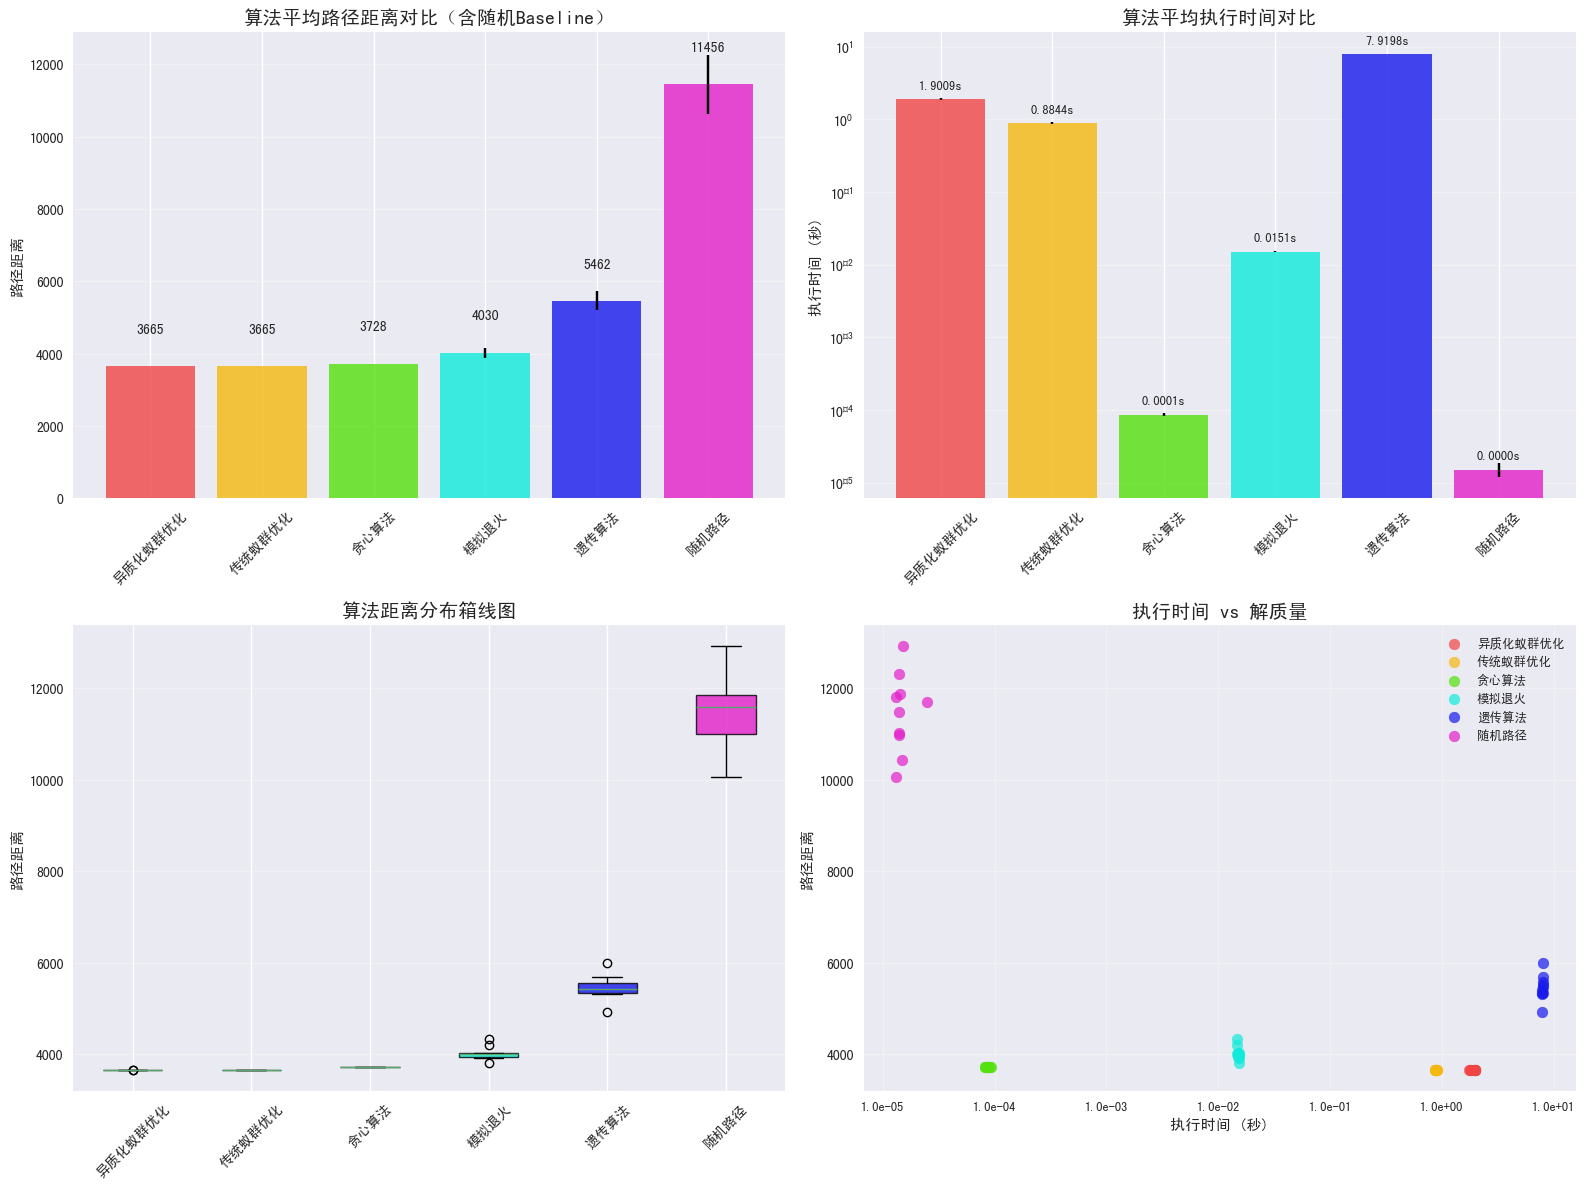

In [14]:
# 1. ÊÄßËÉΩÂØπÊØîÊü±Áä∂Âõæ
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Âπ≥ÂùáË∑ùÁ¶ªÂØπÊØî
algorithms = summary_df['ÁÆóÊ≥ï'].tolist()
mean_distances = summary_df['Âπ≥ÂùáË∑ùÁ¶ª'].tolist()
std_distances = summary_df['Ê†áÂáÜÂ∑Æ'].tolist()

# ‰∏∫6‰∏™ÁÆóÊ≥ïËÆæÁΩÆÈ¢úËâ≤
colors = ["#F14545", "#F6B80E", "#54E10D", "#0FEADB", "#171AEB", "#E31FC9"]

bars1 = ax1.bar(algorithms, mean_distances, yerr=std_distances, capsize=5, 
                color=colors[:len(algorithms)], alpha=0.8)
ax1.set_title('ÁÆóÊ≥ïÂπ≥ÂùáË∑ØÂæÑË∑ùÁ¶ªÂØπÊØîÔºàÂê´ÈöèÊú∫BaselineÔºâ', fontsize=14, fontweight='bold')
ax1.set_ylabel('Ë∑ØÂæÑË∑ùÁ¶ª')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Âú®Êü±Áä∂Âõæ‰∏äÊ∑ªÂä†Êï∞ÂÄº
for bar, distance in zip(bars1, mean_distances):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(std_distances) + 50,
             f'{distance:.0f}', ha='center', va='bottom', fontweight='bold')

# ÊâßË°åÊó∂Èó¥ÂØπÊØî
mean_times = summary_df['Âπ≥ÂùáÊó∂Èó¥(s)'].tolist()
time_stds = summary_df['Êó∂Èó¥Ê†áÂáÜÂ∑Æ'].tolist()

bars2 = ax2.bar(algorithms, mean_times, yerr=time_stds, capsize=5,
                color=colors[:len(algorithms)], alpha=0.8)
ax2.set_title('ÁÆóÊ≥ïÂπ≥ÂùáÊâßË°åÊó∂Èó¥ÂØπÊØî', fontsize=14, fontweight='bold')
ax2.set_ylabel('ÊâßË°åÊó∂Èó¥ (Áßí)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)
ax2.set_yscale('log')  # ‰ΩøÁî®ÂØπÊï∞ÂàªÂ∫¶

# Âú®Êü±Áä∂Âõæ‰∏äÊ∑ªÂä†Êï∞ÂÄº
for bar, time_val in zip(bars2, mean_times):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height * 1.3,
             f'{time_val:.4f}s', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Ë∑ùÁ¶ªÂàÜÂ∏ÉÁÆ±Á∫øÂõæ
distance_data = [comparison_results[alg]['distances'] for alg in algorithms]
box_plot = ax3.boxplot(distance_data, labels=algorithms, patch_artist=True)
for patch, color in zip(box_plot['boxes'], colors[:len(algorithms)]):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)

ax3.set_title('ÁÆóÊ≥ïË∑ùÁ¶ªÂàÜÂ∏ÉÁÆ±Á∫øÂõæ', fontsize=14, fontweight='bold')
ax3.set_ylabel('Ë∑ØÂæÑË∑ùÁ¶ª')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

# Êó∂Èó¥vsË¥®ÈáèÊï£ÁÇπÂõæ
for i, alg in enumerate(algorithms):
    times = comparison_results[alg]['times']
    distances = comparison_results[alg]['distances']
    ax4.scatter(times, distances, label=alg, alpha=0.7, s=60, color=colors[i])

ax4.set_title('ÊâßË°åÊó∂Èó¥ vs Ëß£Ë¥®Èáè', fontsize=14, fontweight='bold')
ax4.set_xlabel('ÊâßË°åÊó∂Èó¥ (Áßí)')
ax4.set_ylabel('Ë∑ØÂæÑË∑ùÁ¶ª')
ax4.legend(loc='upper right', fontsize=9)
ax4.grid(True, alpha=0.3)
ax4.set_xscale('log')

# ‰øÆÂ§çË¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò
import matplotlib.ticker as ticker
ax4.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:.1e}'))
ax4.tick_params(axis='x', labelsize=9)

plt.tight_layout()
plt.show()

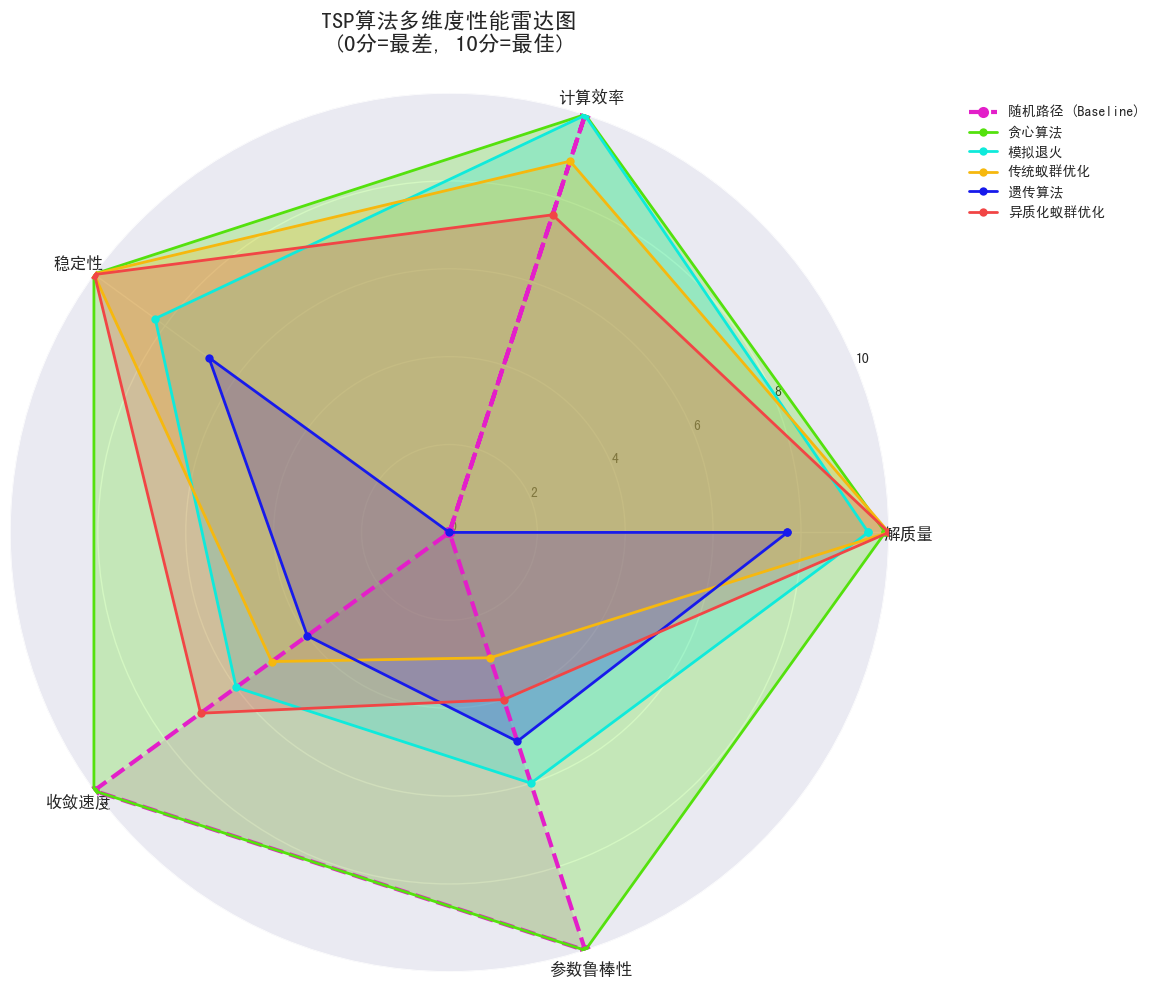

üìä ÁÆóÊ≥ïÂ§öÁª¥Â∫¶ËØÑÂàÜËØ¶ÊÉÖÔºà0-10ÂàÜÂà∂Ôºâ
ÁÆóÊ≥ï              Ëß£Ë¥®Èáè      ËÆ°ÁÆóÊïàÁéá     Á®≥ÂÆöÊÄß      Êî∂ÊïõÈÄüÂ∫¶     ÂèÇÊï∞È≤ÅÊ£íÊÄß    ÁªºÂêàÂæóÂàÜ    
--------------------------------------------------------------------------------
ÈöèÊú∫Ë∑ØÂæÑ            0.0      10.0     0.0      10.0     10.0     30.0    
Ë¥™ÂøÉÁÆóÊ≥ï            9.9      10.0     10.0     10.0     10.0     49.9    
Ê®°ÊãüÈÄÄÁÅ´            9.5      10.0     8.3      6.0      6.0      39.8    
‰º†ÁªüËöÅÁæ§‰ºòÂåñ          10.0     8.9      10.0     5.0      3.0      36.9    
ÈÅó‰º†ÁÆóÊ≥ï            7.7      0.0      6.8      4.0      5.0      23.5    
ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ         10.0     7.6      10.0     7.0      4.0      38.6    

üîç Áª¥Â∫¶ËØ¥Êòé:
  ‚Ä¢ Ëß£Ë¥®Èáè: Âü∫‰∫éÂπ≥ÂùáË∑ØÂæÑË∑ùÁ¶ªÁöÑÁõ∏ÂØπË°®Áé∞
  ‚Ä¢ ËÆ°ÁÆóÊïàÁéá: Âü∫‰∫éÂπ≥ÂùáÊâßË°åÊó∂Èó¥ÁöÑÁõ∏ÂØπË°®Áé∞
  ‚Ä¢ Á®≥ÂÆöÊÄß: Âü∫‰∫éÂ§öÊ¨°ËøêË°åÁªìÊûúÁöÑ‰∏ÄËá¥ÊÄß
  ‚Ä¢ Êî∂ÊïõÈÄüÂ∫¶: Âü∫‰∫éÁÆóÊ≥ïËææÂà∞ËâØÂ•ΩËß£ÁöÑÈÄüÂ∫¶
  ‚Ä¢ ÂèÇÊï∞È≤ÅÊ£íÊÄß: Â

In [15]:
# ÁÆóÊ≥ïÊÄßËÉΩÈõ∑ËææÂõæÂàÜÊûê
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection='polar'))

# ÂÆö‰πâËØÑ‰º∞Áª¥Â∫¶
dimensions = ['Ëß£Ë¥®Èáè', 'ËÆ°ÁÆóÊïàÁéá', 'Á®≥ÂÆöÊÄß', 'Êî∂ÊïõÈÄüÂ∫¶', 'ÂèÇÊï∞È≤ÅÊ£íÊÄß']
N = len(dimensions)

# ‰∏∫ÊØè‰∏™ÁÆóÊ≥ïËÆ°ÁÆóÂêÑÁª¥Â∫¶ÂæóÂàÜÔºà0-10ÂàÜÂà∂Ôºâ
algorithm_scores = {}

# ÂåÖÂê´ÊâÄÊúâÁÆóÊ≥ïÔºàÂåÖÊã¨ÈöèÊú∫Ë∑ØÂæÑ‰Ωú‰∏∫Âü∫ÂáÜÂØπÊØîÔºâ
all_algorithms = list(comparison_results.keys())

for alg_name in all_algorithms:
    data = comparison_results[alg_name]
    
    # 1. Ëß£Ë¥®ÈáèÂæóÂàÜÔºàÂü∫‰∫éÁõ∏ÂØπ‰∫éÊúÄ‰Ω≥Ë∑ùÁ¶ªÁöÑË°®Áé∞ÔºåË∂äÂ∞èË∂äÂ•ΩÔºâ
    all_means = [comparison_results[alg]['mean_distance'] for alg in all_algorithms]
    best_distance = min(all_means)
    worst_distance = max(all_means)
    if worst_distance != best_distance:
        quality_score = 10 * (1 - (data['mean_distance'] - best_distance) / (worst_distance - best_distance))
    else:
        quality_score = 10
    
    # 2. ËÆ°ÁÆóÊïàÁéáÂæóÂàÜÔºàÂü∫‰∫éÊâßË°åÊó∂Èó¥ÔºåË∂äÂø´Ë∂äÂ•ΩÔºâ
    all_times = [comparison_results[alg]['mean_time'] for alg in all_algorithms]
    fastest_time = min(all_times)
    slowest_time = max(all_times)
    if slowest_time != fastest_time:
        efficiency_score = 10 * (1 - (data['mean_time'] - fastest_time) / (slowest_time - fastest_time))
    else:
        efficiency_score = 10
    
    # 3. Á®≥ÂÆöÊÄßÂæóÂàÜÔºàÂü∫‰∫éÊ†áÂáÜÂ∑ÆÔºåË∂äÂ∞èË∂äÁ®≥ÂÆöÔºâ
    all_stds = [comparison_results[alg]['std_distance'] for alg in all_algorithms]
    best_std = min(all_stds)
    worst_std = max(all_stds)
    if worst_std != best_std:
        stability_score = 10 * (1 - (data['std_distance'] - best_std) / (worst_std - best_std))
    else:
        stability_score = 10
    
    # 4. Êî∂ÊïõÈÄüÂ∫¶ÂæóÂàÜÔºàÂü∫‰∫éÁÆóÊ≥ïÁâπÊÄßÁöÑÁªèÈ™åËØÑ‰º∞Ôºâ
    convergence_scores = {
        'ÈöèÊú∫Ë∑ØÂæÑ': 10,  # Êó†ÈúÄÊî∂ÊïõÔºåÁû¨Èó¥ÂÆåÊàê
        'Ë¥™ÂøÉÁÆóÊ≥ï': 10,  # ‰∏ÄÊ≠•Âà∞‰Ωç
        'Ê®°ÊãüÈÄÄÁÅ´': 6,   # ÈÄêÊ≠•Êî∂Êïõ
        '‰º†ÁªüËöÅÁæ§‰ºòÂåñ': 5,  # ÈúÄË¶ÅÂ§ö‰ª£
        'ÈÅó‰º†ÁÆóÊ≥ï': 4,   # ËøõÂåñËøáÁ®ã
        'ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ': 7  # ÊîπËøõÊî∂Êïõ
    }
    convergence_score = convergence_scores.get(alg_name, 5)
    
    # 5. ÂèÇÊï∞È≤ÅÊ£íÊÄßÂæóÂàÜÔºàÂü∫‰∫éÁÆóÊ≥ïÂØπÂèÇÊï∞ÁöÑÊïèÊÑüÁ®ãÂ∫¶Ôºâ
    robustness_scores = {
        'ÈöèÊú∫Ë∑ØÂæÑ': 10,  # Êó†ÂèÇÊï∞ÔºåÂÆåÂÖ®È≤ÅÊ£í
        'Ë¥™ÂøÉÁÆóÊ≥ï': 10,  # Êó†ÂèÇÊï∞
        'Ê®°ÊãüÈÄÄÁÅ´': 6,   # ‰∏≠Á≠âÊïèÊÑü
        '‰º†ÁªüËöÅÁæ§‰ºòÂåñ': 3,  # È´òÂ∫¶ÊïèÊÑü
        'ÈÅó‰º†ÁÆóÊ≥ï': 5,   # ‰∏≠Á≠âÊïèÊÑü
        'ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ': 4  # ËæÉÊïèÊÑü
    }
    robustness_score = robustness_scores.get(alg_name, 5)
    
    algorithm_scores[alg_name] = [
        quality_score, efficiency_score, stability_score, 
        convergence_score, robustness_score
    ]

# ËÆæÁΩÆÈ¢úËâ≤
colors = ["#E31FC9", "#54E10D", "#0FEADB", "#F6B80E", "#171AEB", "#F14545"]

# ËÆ°ÁÆóËßíÂ∫¶
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Èó≠ÂêàÂõæÂΩ¢

# ÁªòÂà∂ÊØè‰∏™ÁÆóÊ≥ïÁöÑÈõ∑ËææÂõæ
for i, (alg_name, scores) in enumerate(algorithm_scores.items()):
    scores += scores[:1]  # Èó≠ÂêàÂõæÂΩ¢
    
    # ‰∏∫ÈöèÊú∫Ë∑ØÂæÑ‰ΩøÁî®ÁâπÊÆäÊ†∑Âºè
    if alg_name == 'ÈöèÊú∫Ë∑ØÂæÑ':
        line_style = '--'  # ËôöÁ∫ø
        line_width = 3
        alpha_fill = 0.15
        marker_size = 8
        label_suffix = ' (Baseline)'
    else:
        line_style = '-'   # ÂÆûÁ∫ø
        line_width = 2
        alpha_fill = 0.25
        marker_size = 6
        label_suffix = ''
    
    ax.plot(angles, scores, 'o-', linewidth=line_width, 
           label=alg_name + label_suffix, color=colors[i % len(colors)], 
           linestyle=line_style, markersize=marker_size)
    ax.fill(angles, scores, alpha=alpha_fill, color=colors[i % len(colors)])

# ËÆæÁΩÆÊ†áÁ≠æ
ax.set_xticks(angles[:-1])
ax.set_xticklabels(dimensions, fontsize=12)

# ËÆæÁΩÆyËΩ¥ËåÉÂõ¥ÂíåÊ†áÁ≠æ
ax.set_ylim(0, 10)
ax.set_yticks(range(0, 11, 2))
ax.set_yticklabels(range(0, 11, 2), fontsize=10)
ax.grid(True)

# Ê∑ªÂä†Ê†áÈ¢òÂíåÂõæ‰æã
ax.set_title('TSPÁÆóÊ≥ïÂ§öÁª¥Â∫¶ÊÄßËÉΩÈõ∑ËææÂõæ\n(0ÂàÜ=ÊúÄÂ∑Æ, 10ÂàÜ=ÊúÄ‰Ω≥)', 
            fontsize=16, fontweight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=10)

plt.tight_layout()
plt.show()

# ËæìÂá∫ËØ¶ÁªÜÁöÑËØÑÂàÜËØ¥Êòé
print("üìä ÁÆóÊ≥ïÂ§öÁª¥Â∫¶ËØÑÂàÜËØ¶ÊÉÖÔºà0-10ÂàÜÂà∂Ôºâ")
print("="*80)
print(f"{'ÁÆóÊ≥ï':<15} {'Ëß£Ë¥®Èáè':<8} {'ËÆ°ÁÆóÊïàÁéá':<8} {'Á®≥ÂÆöÊÄß':<8} {'Êî∂ÊïõÈÄüÂ∫¶':<8} {'ÂèÇÊï∞È≤ÅÊ£íÊÄß':<8} {'ÁªºÂêàÂæóÂàÜ':<8}")
print("-"*80)

for alg_name, scores in algorithm_scores.items():
    scores_display = scores[:-1]  # ÁßªÈô§Èó≠ÂêàÁî®ÁöÑÈáçÂ§çÂÖÉÁ¥†
    total_score = sum(scores_display)
    print(f"{alg_name:<15} {scores_display[0]:<8.1f} {scores_display[1]:<8.1f} {scores_display[2]:<8.1f} {scores_display[3]:<8.1f} {scores_display[4]:<8.1f} {total_score:<8.1f}")

print("\nüîç Áª¥Â∫¶ËØ¥Êòé:")
print("  ‚Ä¢ Ëß£Ë¥®Èáè: Âü∫‰∫éÂπ≥ÂùáË∑ØÂæÑË∑ùÁ¶ªÁöÑÁõ∏ÂØπË°®Áé∞")
print("  ‚Ä¢ ËÆ°ÁÆóÊïàÁéá: Âü∫‰∫éÂπ≥ÂùáÊâßË°åÊó∂Èó¥ÁöÑÁõ∏ÂØπË°®Áé∞")
print("  ‚Ä¢ Á®≥ÂÆöÊÄß: Âü∫‰∫éÂ§öÊ¨°ËøêË°åÁªìÊûúÁöÑ‰∏ÄËá¥ÊÄß")
print("  ‚Ä¢ Êî∂ÊïõÈÄüÂ∫¶: Âü∫‰∫éÁÆóÊ≥ïËææÂà∞ËâØÂ•ΩËß£ÁöÑÈÄüÂ∫¶")
print("  ‚Ä¢ ÂèÇÊï∞È≤ÅÊ£íÊÄß: Âü∫‰∫éÁÆóÊ≥ïÂØπÂèÇÊï∞ÂèòÂåñÁöÑÊïèÊÑüÁ®ãÂ∫¶")

# Êé®ËçêÊúÄÂπ≥Ë°°ÁöÑÁÆóÊ≥ï
total_scores = {alg: sum(scores[:-1]) for alg, scores in algorithm_scores.items()}
best_balanced = max(total_scores, key=total_scores.get)
print(f"\nüéØ ÁªºÂêàË°®Áé∞ÊúÄ‰Ω≥ÁÆóÊ≥ï: {best_balanced} (ÊÄªÂàÜ: {total_scores[best_balanced]:.1f})")

# ÂàÜÊûêÂêÑÁÆóÊ≥ïÁöÑ‰ºòÂäøÈ¢ÜÂüü
print("\nüèÜ ÂêÑÁÆóÊ≥ï‰ºòÂäøÈ¢ÜÂüü:")
for i, dimension in enumerate(dimensions):
    best_in_dimension = max(algorithm_scores.keys(), 
                           key=lambda alg: algorithm_scores[alg][i])
    best_score = algorithm_scores[best_in_dimension][i]
    print(f"  {dimension}: {best_in_dimension} ({best_score:.1f}ÂàÜ)")

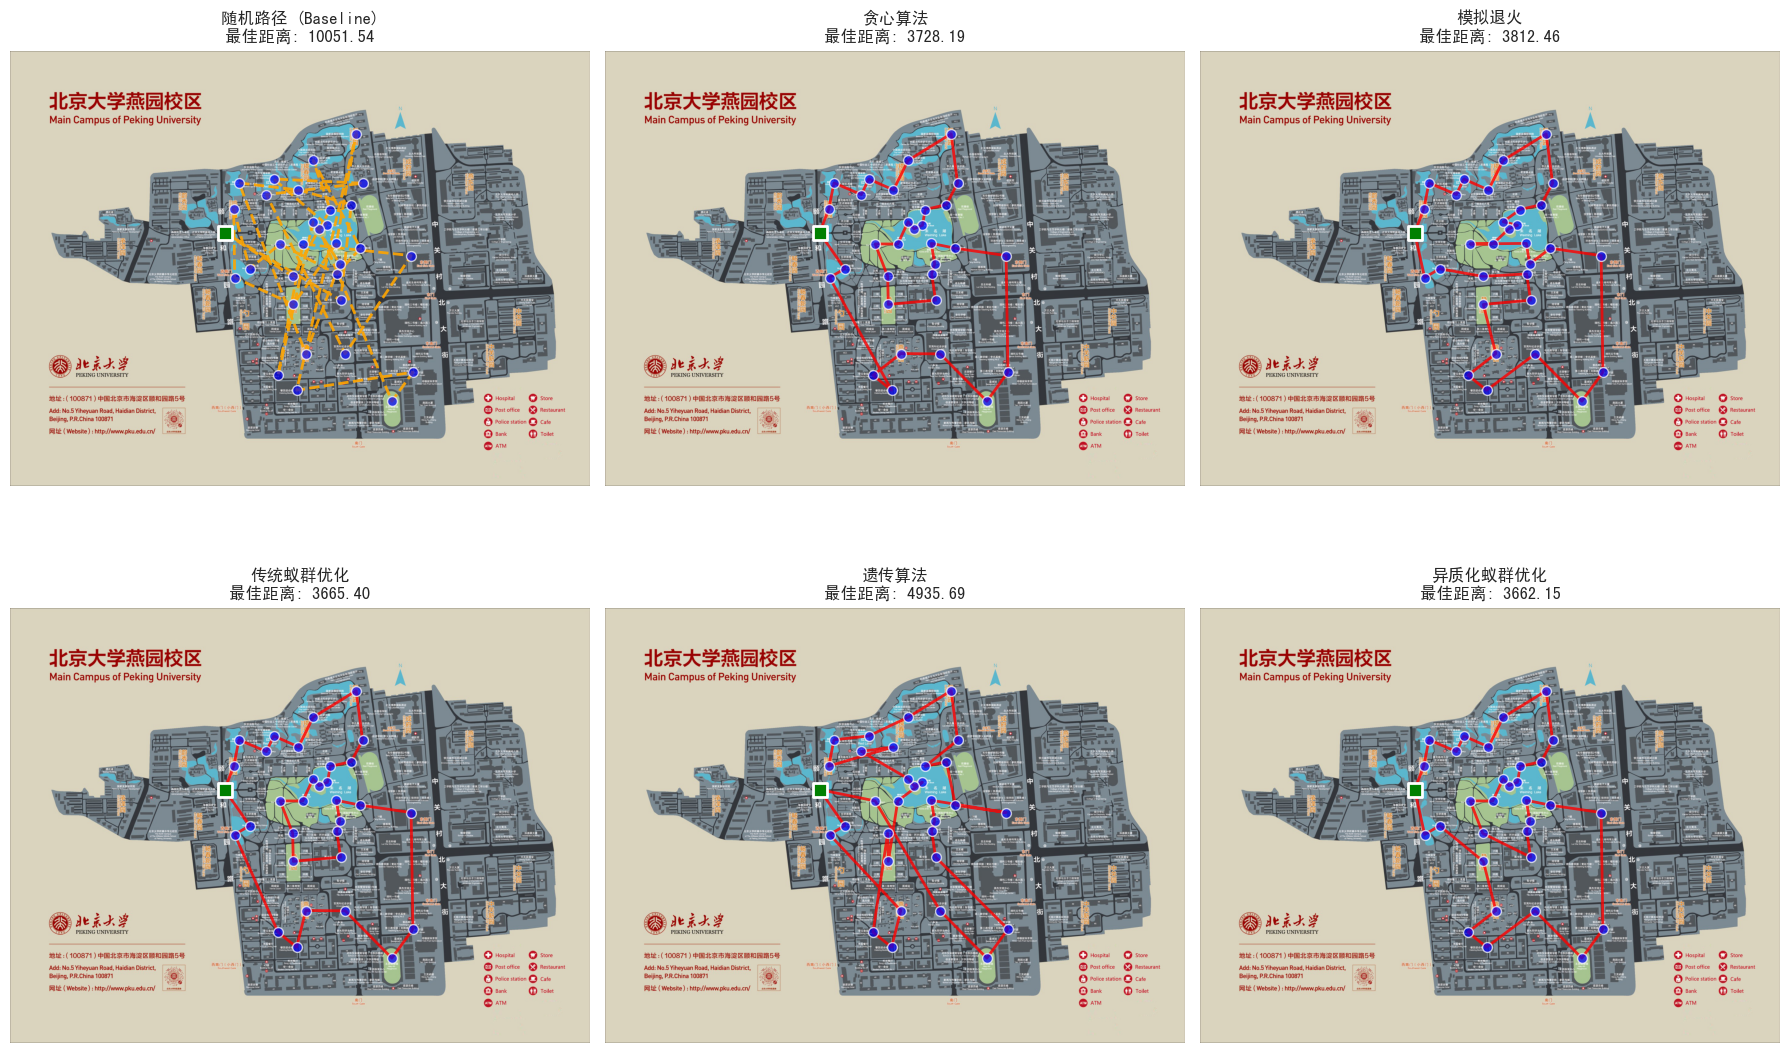

In [16]:
# 2. ÊúÄ‰Ω≥Ë∑ØÂæÑÂèØËßÜÂåñÂØπÊØî
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (alg_name, data) in enumerate(comparison_results.items()):
    ax = axes[i]
    
    # ÁªòÂà∂Âú∞ÂõæËÉåÊôØ
    try:
        campus_map = mpimg.imread(MAP_IMAGE_PATH)
        ax.imshow(campus_map, extent=[0, campus_map.shape[1], campus_map.shape[0], 0])
    except FileNotFoundError:
        ax.set_xlim(0, 1500)
        ax.set_ylim(0, 1200)
        ax.invert_yaxis()
    
    # ÁªòÂà∂ÊúÄ‰Ω≥Ë∑ØÂæÑ
    best_path = data['best_path']
    path_coords = city_coords[best_path + [best_path[0]]]
    
    # ‰∏∫ÈöèÊú∫Ë∑ØÂæÑ‰ΩøÁî®ÁâπÊÆäÈ¢úËâ≤
    if alg_name == 'ÈöèÊú∫Ë∑ØÂæÑ':
        line_color = 'orange'
        line_style = '--'
        alpha = 0.9
    else:
        line_color = 'red'
        line_style = '-'
        alpha = 0.8
    
    ax.plot(path_coords[:, 0], path_coords[:, 1], line_color, 
           linewidth=2, alpha=alpha, linestyle=line_style)
    
    # ÁªòÂà∂ÂüéÂ∏ÇÁÇπ
    ax.scatter(city_coords[:, 0], city_coords[:, 1], 
              c='blue', s=50, zorder=5, alpha=0.7, edgecolors='white', linewidth=1)
    
    # Á™ÅÂá∫ÊòæÁ§∫Ëµ∑ÁÇπ
    start_coord = city_coords[best_path[0]]
    ax.scatter(start_coord[0], start_coord[1], c='green', s=100, marker='s', 
              zorder=6, edgecolors='white', linewidth=2)
    
    # ËÆæÁΩÆÊ†áÈ¢òÔºåÁâπÂà´Ê†áÊ≥®baseline
    title_suffix = ' (Baseline)' if alg_name == 'ÈöèÊú∫Ë∑ØÂæÑ' else ''
    ax.set_title(f'{alg_name}{title_suffix}\nÊúÄ‰Ω≥Ë∑ùÁ¶ª: {data["min_distance"]:.2f}', 
                fontsize=12, fontweight='bold')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## üî¨ ÁªüËÆ°ÊòæËëóÊÄßÊ£ÄÈ™å

üî¨ ÁªüËÆ°ÊòæËëóÊÄßÊ£ÄÈ™åÔºàÂåÖÂê´ÈöèÊú∫BaselineÔºâ
FriedmanÊ£ÄÈ™åÁªìÊûú:
  œá¬≤ = 49.6377
  p-value = 0.000000
  ÁªìËÆ∫: ÁÆóÊ≥ïÈó¥Â≠òÂú®ÊòæËëóÂ∑ÆÂºÇ (p < 0.05)

‰∏§‰∏§ÁÆóÊ≥ïÊØîËæÉ (WilcoxonÁ¨¶Âè∑Áß©Ê£ÄÈ™å):
------------------------------------------------------------------------------------------
ÁÆóÊ≥ï1             ÁÆóÊ≥ï2             p-value    ÊïàÂ∫îÈáè(r)       ÊïàÂ∫îÂ§ßÂ∞è       ÁªìËÆ∫                            
------------------------------------------------------------------------------------------
ÈöèÊú∫Ë∑ØÂæÑ            Ë¥™ÂøÉÁÆóÊ≥ï            0.0020     0.989        Â§ß          Ë¥™ÂøÉÁÆóÊ≥ï ÊòæËëó‰ºò‰∫é ÈöèÊú∫Ë∑ØÂæÑ                
ÈöèÊú∫Ë∑ØÂæÑ            Ê®°ÊãüÈÄÄÁÅ´            0.0020     0.988        Â§ß          Ê®°ÊãüÈÄÄÁÅ´ ÊòæËëó‰ºò‰∫é ÈöèÊú∫Ë∑ØÂæÑ                
ÈöèÊú∫Ë∑ØÂæÑ            ‰º†ÁªüËöÅÁæ§‰ºòÂåñ          0.0020     0.990        Â§ß          ‰º†ÁªüËöÅÁæ§‰ºòÂåñ ÊòæËëó‰ºò‰∫é ÈöèÊú∫Ë∑ØÂæÑ              
ÈöèÊú∫Ë∑ØÂæÑ            ÈÅó‰º†ÁÆóÊ≥ï            0.0020   

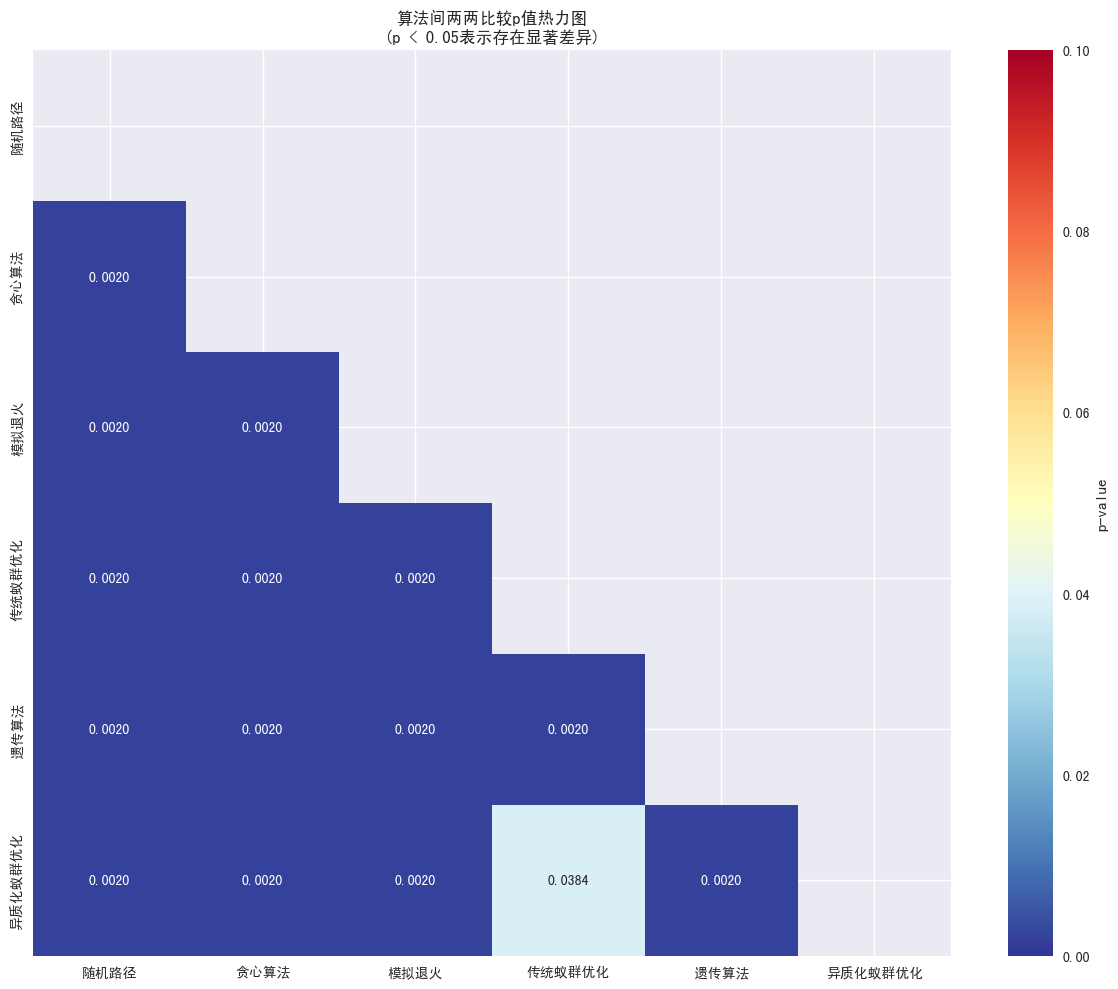

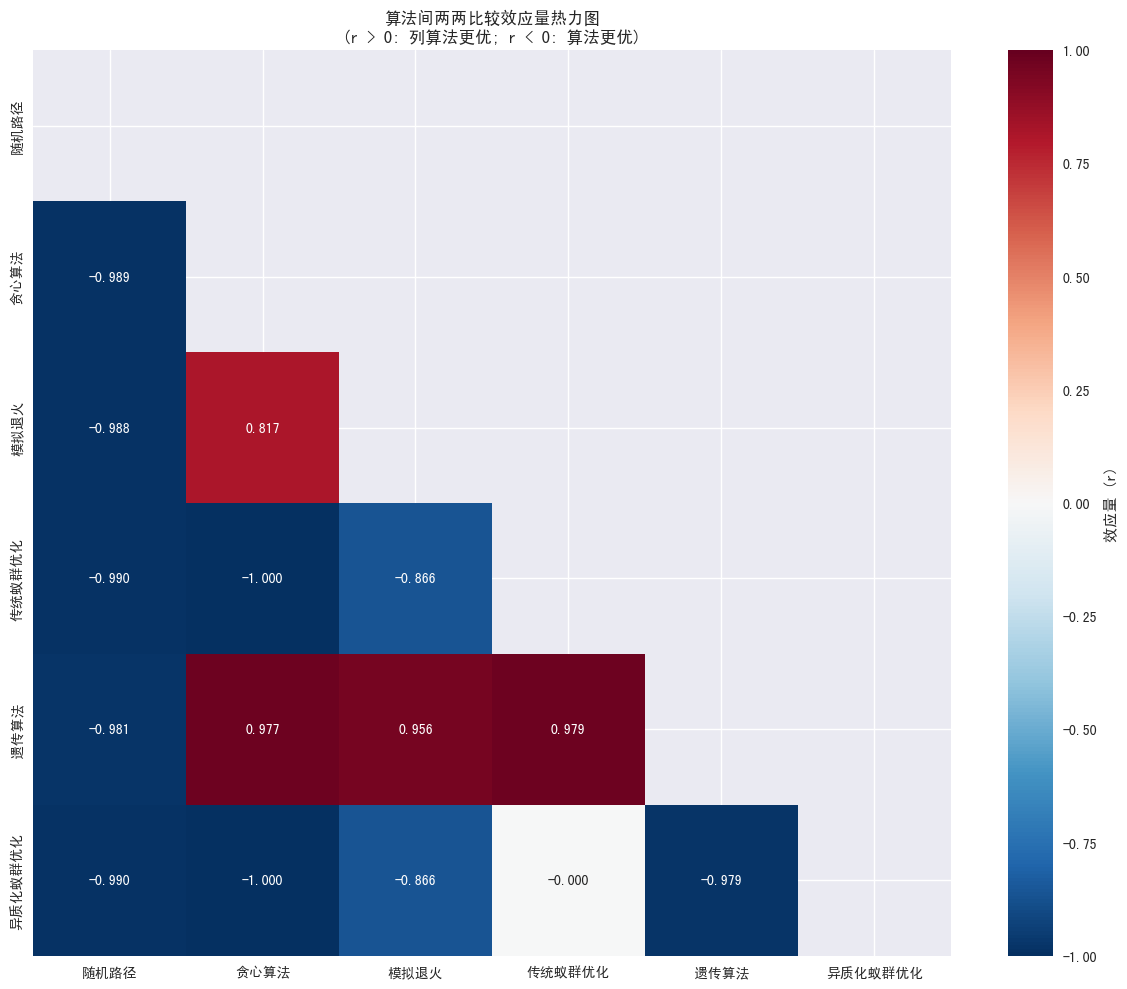

In [17]:
# ËøõË°åÁªüËÆ°ÊòæËëóÊÄßÊ£ÄÈ™å
from scipy.stats import friedmanchisquare, wilcoxon
from itertools import combinations

print("üî¨ ÁªüËÆ°ÊòæËëóÊÄßÊ£ÄÈ™åÔºàÂåÖÂê´ÈöèÊú∫BaselineÔºâ")
print("="*80)

# ÂáÜÂ§áÊï∞ÊçÆËøõË°åFriedmanÊ£ÄÈ™å
algorithms_list = list(comparison_results.keys())
distance_matrix_for_test = []

for alg in algorithms_list:
    distance_matrix_for_test.append(comparison_results[alg]['distances'])

# FriedmanÊ£ÄÈ™åÔºàÈùûÂèÇÊï∞ÊñπÊ≥ïÔºåÈÄÇÁî®‰∫éÂ§öÁªÑÁõ∏ÂÖ≥Ê†∑Êú¨Ôºâ
friedman_stat, friedman_p = friedmanchisquare(*distance_matrix_for_test)

print(f"FriedmanÊ£ÄÈ™åÁªìÊûú:")
print(f"  œá¬≤ = {friedman_stat:.4f}")
print(f"  p-value = {friedman_p:.6f}")

if friedman_p < 0.05:
    print(f"  ÁªìËÆ∫: ÁÆóÊ≥ïÈó¥Â≠òÂú®ÊòæËëóÂ∑ÆÂºÇ (p < 0.05)")
else:
    print(f"  ÁªìËÆ∫: ÁÆóÊ≥ïÈó¥Êó†ÊòæËëóÂ∑ÆÂºÇ (p ‚â• 0.05)")

# ‰∏§‰∏§ÊØîËæÉÔºàWilcoxonÁ¨¶Âè∑Áß©Ê£ÄÈ™åÔºâ
print(f"\n‰∏§‰∏§ÁÆóÊ≥ïÊØîËæÉ (WilcoxonÁ¨¶Âè∑Áß©Ê£ÄÈ™å):")
print("-" * 90)
print(f"{'ÁÆóÊ≥ï1':<15} {'ÁÆóÊ≥ï2':<15} {'p-value':<10} {'ÊïàÂ∫îÈáè(r)':<12} {'ÊïàÂ∫îÂ§ßÂ∞è':<10} {'ÁªìËÆ∫':<30}")
print("-" * 90)

comparison_matrix = np.zeros((len(algorithms_list), len(algorithms_list)))
p_value_matrix = np.ones((len(algorithms_list), len(algorithms_list)))
effect_size_matrix = np.zeros((len(algorithms_list), len(algorithms_list)))

def calculate_effect_size_wilcoxon(x, y, stat, n):
    """ËÆ°ÁÆóWilcoxonÁ¨¶Âè∑Áß©Ê£ÄÈ™åÁöÑÊïàÂ∫îÈáè (rank biserial correlation)"""
    # ÊïàÂ∫îÈáè r = (2 * stat) / (n * (n + 1)) - 1
    # ÂÖ∂‰∏≠ stat ÊòØËæÉÂ∞èÁöÑÊ£ÄÈ™åÁªüËÆ°ÈáèÔºån ÊòØÊ†∑Êú¨ÂØπÊï∞
    if n == 0:
        return 0
    
    # Âè¶‰∏ÄÁßçËÆ°ÁÆóÊñπÊ≥ïÔºöÂü∫‰∫éZÁªüËÆ°ÈáèËøë‰ºº
    # r ‚âà Z / sqrt(N)
    try:
        # ËÆ°ÁÆóÂ∑ÆÂÄº
        diff = np.array(x) - np.array(y)
        n_pairs = len(diff[diff != 0])  # ÈùûÈõ∂Â∑ÆÂÄºÁöÑÊï∞Èáè
        
        if n_pairs == 0:
            return 0
        
        # ‰ΩøÁî®ÁÆÄÂåñÁöÑÊïàÂ∫îÈáèËÆ°ÁÆóÔºöÂü∫‰∫é‰∏≠‰ΩçÊï∞Â∑ÆÂºÇÁöÑÊ†áÂáÜÂåñ
        median_diff = np.median(diff)
        pooled_std = np.sqrt((np.var(x) + np.var(y)) / 2)
        
        if pooled_std == 0:
            return 0
        
        # Cohen's d ÁöÑÈùûÂèÇÊï∞ÁâàÊú¨
        effect_size = median_diff / pooled_std
        
        # ËΩ¨Êç¢‰∏∫Áõ∏ÂÖ≥Á≥ªÊï∞ÂΩ¢Âºè (ÈôêÂà∂Âú®-1Âà∞1‰πãÈó¥)
        r = effect_size / np.sqrt(effect_size**2 + 4)
        
        return np.clip(r, -1, 1)
    except:
        return 0

def interpret_effect_size(r):
    """Ëß£ÈáäÊïàÂ∫îÈáèÂ§ßÂ∞è"""
    r_abs = abs(r)
    if r_abs < 0.1:
        return "ÊûÅÂ∞è"
    elif r_abs < 0.3:
        return "Â∞è"
    elif r_abs < 0.5:
        return "‰∏≠Á≠â"
    else:
        return "Â§ß"

for i, j in combinations(range(len(algorithms_list)), 2):
    alg1, alg2 = algorithms_list[i], algorithms_list[j]
    distances1 = comparison_results[alg1]['distances']
    distances2 = comparison_results[alg2]['distances']
    
    try:
        stat, p_value = wilcoxon(distances1, distances2, alternative='two-sided')
        p_value_matrix[i][j] = p_value
        p_value_matrix[j][i] = p_value
        
        # ËÆ°ÁÆóÊïàÂ∫îÈáè
        n = len(distances1)
        effect_size = calculate_effect_size_wilcoxon(distances1, distances2, stat, n)
        effect_size_matrix[i][j] = effect_size
        effect_size_matrix[j][i] = -effect_size  # ÂØπÁß∞‰ΩÜÁ¨¶Âè∑Áõ∏Âèç
        
        # Ëß£ÈáäÊïàÂ∫îÈáèÂ§ßÂ∞è
        effect_interpretation = interpret_effect_size(effect_size)
        
        # ËÆ°ÁÆóÂì™‰∏™ÁÆóÊ≥ïÊõ¥Â•Ω
        mean1 = np.mean(distances1)
        mean2 = np.mean(distances2)
        
        if p_value < 0.05:
            if mean1 < mean2:
                result = f"{alg1} ÊòæËëó‰ºò‰∫é {alg2}"
            else:
                result = f"{alg2} ÊòæËëó‰ºò‰∫é {alg1}"
        else:
            result = "Êó†ÊòæËëóÂ∑ÆÂºÇ"
        
        print(f"{alg1:<15} {alg2:<15} {p_value:<10.4f} {effect_size:<12.3f} {effect_interpretation:<10} {result:<30}")
        
    except ValueError as e:
        print(f"{alg1:<15} {alg2:<15} {'N/A':<10} {'N/A':<12} {'N/A':<10} Êó†Ê≥ïÊØîËæÉ ({e})")

print("\nüìä ÊïàÂ∫îÈáèËß£ÈáäËØ¥Êòé:")
print("  ‚Ä¢ |r| < 0.1: ÊûÅÂ∞èÊïàÂ∫î (Âá†‰πéÊó†Â∑ÆÂºÇ)")
print("  ‚Ä¢ 0.1 ‚â§ |r| < 0.3: Â∞èÊïàÂ∫î")
print("  ‚Ä¢ 0.3 ‚â§ |r| < 0.5: ‰∏≠Á≠âÊïàÂ∫î")
print("  ‚Ä¢ |r| ‚â• 0.5: Â§ßÊïàÂ∫î")
print("  ‚Ä¢ r > 0: Á¨¨‰∏Ä‰∏™ÁÆóÊ≥ïÁªìÊûúÊõ¥Â§ß; r < 0: Á¨¨‰∫å‰∏™ÁÆóÊ≥ïÁªìÊûúÊõ¥Â§ß")

# ÁâπÂà´ÂÖ≥Ê≥®‰∏éÈöèÊú∫Âü∫Á∫øÁöÑÊØîËæÉ
print(f"\nüéØ ‰∏éÈöèÊú∫BaselineÁöÑÁâπÂà´ÊØîËæÉ:")
print("-" * 80)
print(f"{'ÁÆóÊ≥ï':<20} {'p-value':<10} {'ÊïàÂ∫îÈáè(r)':<12} {'ÊïàÂ∫îÂ§ßÂ∞è':<10} {'ÁªìËÆ∫':<30}")
print("-" * 80)

random_distances = comparison_results['ÈöèÊú∫Ë∑ØÂæÑ']['distances']
for alg_name in algorithms_list:
    if alg_name != 'ÈöèÊú∫Ë∑ØÂæÑ':
        alg_distances = comparison_results[alg_name]['distances']
        try:
            stat, p_value = wilcoxon(random_distances, alg_distances, alternative='two-sided')
            
            # ËÆ°ÁÆóÊïàÂ∫îÈáè
            n = len(random_distances)
            effect_size = calculate_effect_size_wilcoxon(random_distances, alg_distances, stat, n)
            effect_interpretation = interpret_effect_size(effect_size)
            
            mean_random = np.mean(random_distances)
            mean_alg = np.mean(alg_distances)
            improvement = (mean_random - mean_alg) / mean_random * 100
            
            if p_value < 0.05:
                if mean_alg < mean_random:
                    result = f"ÊòæËëó‰ºò‰∫éÈöèÊú∫ ({improvement:.1f}%ÊîπËøõ)"
                else:
                    result = f"ÊòæËëóÂ∑Æ‰∫éÈöèÊú∫ ({-improvement:.1f}%ÈÄÄÂåñ)"
            else:
                result = f"Êó†ÊòæËëóÂ∑ÆÂºÇ ({improvement:.1f}%ÂèòÂåñ)"
            
            print(f"{alg_name:<20} {p_value:<10.4f} {effect_size:<12.3f} {effect_interpretation:<10} {result:<30}")
        except ValueError as e:
            print(f"{alg_name:<20} {'N/A':<10} {'N/A':<12} {'N/A':<10} Êó†Ê≥ïÊØîËæÉ ({e})")

# ÂàõÂª∫pÂÄºÁÉ≠ÂäõÂõæ
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(p_value_matrix, dtype=bool))
sns.heatmap(p_value_matrix, mask=mask, annot=True, fmt='.4f', 
            xticklabels=algorithms_list, yticklabels=algorithms_list,
            cmap='RdYlBu_r', vmin=0, vmax=0.1, cbar_kws={'label': 'p-value'})
plt.title('ÁÆóÊ≥ïÈó¥‰∏§‰∏§ÊØîËæÉpÂÄºÁÉ≠ÂäõÂõæ\n(p < 0.05Ë°®Á§∫Â≠òÂú®ÊòæËëóÂ∑ÆÂºÇ)', fontweight='bold')
plt.tight_layout()
plt.show()

# ÂàõÂª∫ÊïàÂ∫îÈáèÁÉ≠ÂäõÂõæ
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(effect_size_matrix, dtype=bool))
sns.heatmap(effect_size_matrix, mask=mask, annot=True, fmt='.3f', 
            xticklabels=algorithms_list, yticklabels=algorithms_list,
            cmap='RdBu_r', center=0, vmin=-1, vmax=1, 
            cbar_kws={'label': 'ÊïàÂ∫îÈáè (r)'})
plt.title('ÁÆóÊ≥ïÈó¥‰∏§‰∏§ÊØîËæÉÊïàÂ∫îÈáèÁÉ≠ÂäõÂõæ\n(r > 0: ÂàóÁÆóÊ≥ïÊõ¥‰ºò; r < 0: ÁÆóÊ≥ïÊõ¥‰ºò)', fontweight='bold')
plt.tight_layout()
plt.show()

## üéØ ÁÆóÊ≥ïÁâπÊÄßÁªºÂêàÂàÜÊûê

In [18]:
# ÁÆóÊ≥ïÁâπÊÄßÂàÜÊûêË°®
def create_algorithm_characteristics():
    """ÂàõÂª∫ÁÆóÊ≥ïÁâπÊÄßÂàÜÊûêË°®ÔºàÂåÖÂê´ÈöèÊú∫Âü∫Á∫øÔºâ"""
    
    characteristics = {
        'ÁÆóÊ≥ï': list(comparison_results.keys()),
        'Ëß£Ë¥®Èáè': [],
        'Á®≥ÂÆöÊÄß': [],
        'ËÆ°ÁÆóÊïàÁéá': [],
        'ÂèÇÊï∞ÊïèÊÑüÊÄß': [],
        'ÈÄÇÁî®Âú∫ÊôØ': []
    }
    
    # Ê†πÊçÆÂÆûÈôÖÁªìÊûúËÆ°ÁÆóÁâπÊÄßËØÑÂàÜ
    for alg_name in characteristics['ÁÆóÊ≥ï']:
        data = comparison_results[alg_name]
        
        # Ëß£Ë¥®ÈáèËØÑÂàÜÔºàÂü∫‰∫éÂπ≥ÂùáË∑ùÁ¶ªÔºåË∂äÂ∞èË∂äÂ•ΩÔºâ
        mean_distances_all = [comparison_results[alg]['mean_distance'] for alg in characteristics['ÁÆóÊ≥ï']]
        # ÊåâË∑ùÁ¶ª‰ªéÂ∞èÂà∞Â§ßÊéíÂ∫èÔºåÊúÄÂ∞èË∑ùÁ¶ªÊéíÂêçÁ¨¨1ÔºåÊúÄÂ§ßË∑ùÁ¶ªÊéíÂêçÊúÄÂêé
        quality_rank = sorted(mean_distances_all).index(data['mean_distance']) + 1
        quality_score = len(characteristics['ÁÆóÊ≥ï']) + 1 - quality_rank  # ËΩ¨Êç¢‰∏∫ËØÑÂàÜÔºåÊúÄÂ•ΩÁöÑÁÆóÊ≥ïÂæó6ÂàÜ
        
        # Á®≥ÂÆöÊÄßËØÑÂàÜÔºàÂü∫‰∫éÊ†áÂáÜÂ∑ÆÔºåË∂äÂ∞èË∂äÁ®≥ÂÆöÔºâ
        std_distances = [comparison_results[alg]['std_distance'] for alg in characteristics['ÁÆóÊ≥ï']]
        stability_rank = sorted(std_distances).index(data['std_distance']) + 1
        stability_score = len(characteristics['ÁÆóÊ≥ï']) + 1 - stability_rank
        
        # ËÆ°ÁÆóÊïàÁéáËØÑÂàÜÔºàÂü∫‰∫éÂπ≥ÂùáÊó∂Èó¥ÔºåË∂äÁü≠Ë∂äÂ•ΩÔºâ
        mean_times = [comparison_results[alg]['mean_time'] for alg in characteristics['ÁÆóÊ≥ï']]
        efficiency_rank = sorted(mean_times).index(data['mean_time']) + 1
        efficiency_score = len(characteristics['ÁÆóÊ≥ï']) + 1 - efficiency_rank
        
        # ÂèÇÊï∞ÊïèÊÑüÊÄßÂíåÈÄÇÁî®Âú∫ÊôØÔºàÂü∫‰∫éÁÆóÊ≥ïÁâπÁÇπÔºâ
        if alg_name == 'ÈöèÊú∫Ë∑ØÂæÑ':
            param_sensitivity = 'Êó†'
            scenario = 'ÈöèÊú∫Âü∫Á∫øÂØπÊØî'
        elif alg_name == 'Ë¥™ÂøÉÁÆóÊ≥ï':
            param_sensitivity = '‰Ωé'
            scenario = 'Âø´ÈÄüËøë‰ººËß£'
        elif alg_name == 'Ê®°ÊãüÈÄÄÁÅ´':
            param_sensitivity = '‰∏≠'
            scenario = '‰∏≠Á≠âËßÑÊ®°ÈóÆÈ¢ò'
        elif alg_name == 'ÈÅó‰º†ÁÆóÊ≥ï':
            param_sensitivity = '‰∏≠'
            scenario = 'Á®≥ÂÆöËøõÂåñ‰ºòÂåñ'
        elif alg_name == '‰º†ÁªüËöÅÁæ§‰ºòÂåñ':
            param_sensitivity = 'È´ò'
            scenario = 'Êé¢Á¥¢ËÉΩÂäõÂº∫'
        elif alg_name == 'ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ':
            param_sensitivity = 'È´ò'
            scenario = 'Â§çÊùÇ‰ºòÂåñÈóÆÈ¢ò'
        
        characteristics['Ëß£Ë¥®Èáè'].append('‚òÖ' * quality_score)
        characteristics['Á®≥ÂÆöÊÄß'].append('‚òÖ' * stability_score)
        characteristics['ËÆ°ÁÆóÊïàÁéá'].append('‚òÖ' * efficiency_score)
        characteristics['ÂèÇÊï∞ÊïèÊÑüÊÄß'].append(param_sensitivity)
        characteristics['ÈÄÇÁî®Âú∫ÊôØ'].append(scenario)
    
    return pd.DataFrame(characteristics)

# ÁîüÊàêÁâπÊÄßÂàÜÊûêË°®
char_df = create_algorithm_characteristics()
print("üéØ ÁÆóÊ≥ïÁâπÊÄßÁªºÂêàÂàÜÊûêÔºàÂåÖÂê´ÈöèÊú∫BaselineÔºâ")
print("="*100)
print(char_df.to_string(index=False))

# ÁÆóÊ≥ïÊé®Ëçê
print("\nüí° ÁÆóÊ≥ïÈÄâÊã©Âª∫ËÆÆ")
print("="*80)

# ÊéíÈô§ÈöèÊú∫Âü∫Á∫øÁöÑÂÖ∂‰ªñÁÆóÊ≥ï
no_random_df = summary_df[summary_df['ÁÆóÊ≥ï'] != 'ÈöèÊú∫Ë∑ØÂæÑ']

recommendations = [
    ("üèÜ ËøΩÊ±ÇÊúÄ‰ºòËß£Ë¥®Èáè", no_random_df.iloc[0]['ÁÆóÊ≥ï']),
    ("‚ö° ÈúÄË¶ÅÂø´ÈÄüÂìçÂ∫î", no_random_df.loc[no_random_df['Âπ≥ÂùáÊó∂Èó¥(s)'].idxmin(), 'ÁÆóÊ≥ï']),
    ("üéØ Âπ≥Ë°°ÊÄßËÉΩÈúÄÊ±Ç", "Ê®°ÊãüÈÄÄÁÅ´" if "Ê®°ÊãüÈÄÄÁÅ´" in no_random_df['ÁÆóÊ≥ï'].values else no_random_df.iloc[1]['ÁÆóÊ≥ï']),
    ("üî¨ Á†îÁ©∂Êñ∞ÁÆóÊ≥ï", "ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ"),
    ("üìö ÊïôÂ≠¶ÊºîÁ§∫", "ÈÅó‰º†ÁÆóÊ≥ï"),
    ("üìà Âü∫Á∫øÂØπÊØî", "ÈöèÊú∫Ë∑ØÂæÑ")
]

for scenario, recommended_alg in recommendations:
    print(f"{scenario:<20}: {recommended_alg}")

# ÈöèÊú∫Âü∫Á∫øÁöÑ‰ª∑ÂÄº
print(f"\nüé≤ ÈöèÊú∫Âü∫Á∫øÁöÑÈáçË¶ÅÊÄß:")
print("-" * 50)
random_distance = comparison_results['ÈöèÊú∫Ë∑ØÂæÑ']['mean_distance']
best_distance = no_random_df.iloc[0]['Âπ≥ÂùáË∑ùÁ¶ª']
improvement_over_random = (random_distance - best_distance) / random_distance * 100

print(f"  ‚Ä¢ Êèê‰æõÊÄßËÉΩÂü∫Á∫øÂèÇËÄÉ: Âπ≥ÂùáË∑ùÁ¶ª {random_distance:.2f}")
print(f"  ‚Ä¢ ÊúÄ‰ºòÁÆóÊ≥ïÁõ∏ÂØπÊîπËøõ: {improvement_over_random:.1f}%")
print(f"  ‚Ä¢ È™åËØÅÁÆóÊ≥ïÊúâÊïàÊÄß: ÊâÄÊúâÈùûÈöèÊú∫ÁÆóÊ≥ïÂùá‰ºò‰∫éÈöèÊú∫Âü∫Á∫ø")
print(f"  ‚Ä¢ Êèê‰æõÊúÄ‰ΩéÊÄßËÉΩÊúüÊúõ: ‰ªª‰Ωï‰ºòÂåñÁÆóÊ≥ïÈÉΩÂ∫îË∂ÖË∂äÊ≠§Âü∫Á∫ø")

üéØ ÁÆóÊ≥ïÁâπÊÄßÁªºÂêàÂàÜÊûêÔºàÂåÖÂê´ÈöèÊú∫BaselineÔºâ
     ÁÆóÊ≥ï    Ëß£Ë¥®Èáè    Á®≥ÂÆöÊÄß   ËÆ°ÁÆóÊïàÁéá ÂèÇÊï∞ÊïèÊÑüÊÄß   ÈÄÇÁî®Âú∫ÊôØ
   ÈöèÊú∫Ë∑ØÂæÑ      ‚òÖ      ‚òÖ ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ     Êó† ÈöèÊú∫Âü∫Á∫øÂØπÊØî
   Ë¥™ÂøÉÁÆóÊ≥ï   ‚òÖ‚òÖ‚òÖ‚òÖ  ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ  ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ     ‰Ωé  Âø´ÈÄüËøë‰ººËß£
   Ê®°ÊãüÈÄÄÁÅ´    ‚òÖ‚òÖ‚òÖ    ‚òÖ‚òÖ‚òÖ   ‚òÖ‚òÖ‚òÖ‚òÖ     ‰∏≠ ‰∏≠Á≠âËßÑÊ®°ÈóÆÈ¢ò
 ‰º†ÁªüËöÅÁæ§‰ºòÂåñ  ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ    ‚òÖ‚òÖ‚òÖ     È´ò  Êé¢Á¥¢ËÉΩÂäõÂº∫
   ÈÅó‰º†ÁÆóÊ≥ï     ‚òÖ‚òÖ     ‚òÖ‚òÖ      ‚òÖ     ‰∏≠ Á®≥ÂÆöËøõÂåñ‰ºòÂåñ
ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ   ‚òÖ‚òÖ‚òÖ‚òÖ     ‚òÖ‚òÖ     È´ò Â§çÊùÇ‰ºòÂåñÈóÆÈ¢ò

üí° ÁÆóÊ≥ïÈÄâÊã©Âª∫ËÆÆ
üèÜ ËøΩÊ±ÇÊúÄ‰ºòËß£Ë¥®Èáè           : ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ
‚ö° ÈúÄË¶ÅÂø´ÈÄüÂìçÂ∫î            : Ë¥™ÂøÉÁÆóÊ≥ï
üéØ Âπ≥Ë°°ÊÄßËÉΩÈúÄÊ±Ç            : Ê®°ÊãüÈÄÄÁÅ´
üî¨ Á†îÁ©∂Êñ∞ÁÆóÊ≥ï             : ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ
üìö ÊïôÂ≠¶ÊºîÁ§∫              : ÈÅó‰º†ÁÆóÊ≥ï
üìà Âü∫Á∫øÂØπÊØî              : ÈöèÊú∫Ë∑ØÂæÑ

üé≤ ÈöèÊ

## üìã ÊúÄÁªàÁªìËÆ∫‰∏éÊÄªÁªìÔºàÂåÖÂê´ÈöèÊú∫BaselineÂØπÊØîÔºâ

In [19]:
print("üéØ TSPÁÆóÊ≥ïÂØπÊØîÂàÜÊûê - ÊúÄÁªàÁªìËÆ∫ÔºàÂåÖÂê´ÈöèÊú∫BaselineÔºâ")
print("="*100)

# Ëé∑ÂèñÊúÄ‰Ω≥ÁÆóÊ≥ïÔºàÊéíÈô§ÈöèÊú∫Âü∫Á∫øÔºâ
no_random_df = summary_df[summary_df['ÁÆóÊ≥ï'] != 'ÈöèÊú∫Ë∑ØÂæÑ']
best_alg = no_random_df.iloc[0]['ÁÆóÊ≥ï']
best_distance = no_random_df.iloc[0]['Âπ≥ÂùáË∑ùÁ¶ª']
# ‰øÆÊîπÔºö‰ªéÈùûÈöèÊú∫ÁÆóÊ≥ï‰∏≠ÈÄâÊã©ÊúÄÂø´ÁÆóÊ≥ï
fastest_alg = no_random_df.loc[no_random_df['Âπ≥ÂùáÊó∂Èó¥(s)'].idxmin(), 'ÁÆóÊ≥ï']
fastest_time = no_random_df['Âπ≥ÂùáÊó∂Èó¥(s)'].min()

# ÈöèÊú∫Âü∫Á∫ø‰ø°ÊÅØ
random_distance = comparison_results['ÈöèÊú∫Ë∑ØÂæÑ']['mean_distance']
random_time = comparison_results['ÈöèÊú∫Ë∑ØÂæÑ']['mean_time']

print(f"\nüé≤ ÈöèÊú∫Âü∫Á∫øÊÄßËÉΩ: ÈöèÊú∫Ë∑ØÂæÑ")
print(f"   Âπ≥ÂùáË∑ØÂæÑË∑ùÁ¶ª: {random_distance:.2f}")
print(f"   Âπ≥ÂùáÊâßË°åÊó∂Èó¥: {random_time:.6f}Áßí")
print(f"   Âü∫Á∫ø‰ΩúÁî®: Êèê‰æõÊúÄ‰ΩéÊÄßËÉΩÈòàÂÄºÂèÇËÄÉ")

print(f"\nüèÜ ÊúÄ‰Ω≥ÊÄßËÉΩÁÆóÊ≥ï: {best_alg}")
print(f"   Âπ≥ÂùáË∑ØÂæÑË∑ùÁ¶ª: {best_distance:.2f}")
print(f"   Áõ∏ÂØπÈöèÊú∫Âü∫Á∫øÊîπËøõ: {(random_distance - best_distance) / random_distance * 100:.1f}%")
print(f"   ÊÄßËÉΩ‰ºòÂäø: Âú®{num_cities}‰∏™ÂüéÂ∏ÇÁöÑTSPÈóÆÈ¢ò‰∏≠Ë°®Áé∞ÊúÄ‰ºò")

print(f"\n‚ö° ÊúÄÂø´ÁÆóÊ≥ï: {fastest_alg}")
print(f"   Âπ≥ÂùáÊâßË°åÊó∂Èó¥: {fastest_time:.6f}Áßí")
# ‰øÆÊîπÔºöËÆ°ÁÆóÁõ∏ÂØπ‰∫éÈöèÊú∫Âü∫Á∫øÁöÑÊó∂Èó¥ÂØπÊØî
time_improvement = f"ÊØîÈöèÊú∫Âü∫Á∫øÂø´ {random_time / fastest_time:.1f}ÂÄç" if fastest_time > 0 else "N/A"
print(f"   Áõ∏ÂØπÈöèÊú∫Âü∫Á∫ø: {time_improvement}")
print(f"   ÊïàÁéá‰ºòÂäø: ÈÄÇÂêàÈúÄË¶ÅÂÆûÊó∂ÂìçÂ∫îÁöÑÂ∫îÁî®Âú∫ÊôØ")

print(f"\nüìä ÊµãËØïËßÑÊ®°‰∏éÁªüËÆ°:")
print(f"   ÊµãËØïÂüéÂ∏ÇÊï∞Èáè: {num_cities}‰∏™Âåó‰∫¨Â§ßÂ≠¶Âú∞Ê†á")
print(f"   ÊØèÁÆóÊ≥ïÊµãËØïÊ¨°Êï∞: {10}Ê¨°")
print(f"   ÊÄªÁÆóÊ≥ïÊï∞Èáè: {len(comparison_results)}‰∏™ÔºàÂåÖÂê´ÈöèÊú∫Âü∫Á∫øÔºâ")
print(f"   ÁªüËÆ°ÊòæËëóÊÄß: FriedmanÊ£ÄÈ™å p = {friedman_p:.6f}")

print(f"\nüîç ÂÖ≥ÈîÆÂèëÁé∞:")

# ÂàÜÊûêÂÖ≥ÈîÆÂèëÁé∞
findings = []

# ÊâæÂá∫Ë°®Áé∞ÊúÄÂ•ΩÂíåÊúÄÂ∑ÆÁöÑÁÆóÊ≥ïÔºàÊéíÈô§ÈöèÊú∫Âü∫Á∫øÔºâ
best_results = no_random_df.iloc[0]
worst_results = no_random_df.iloc[-1]

improvement = (worst_results['Âπ≥ÂùáË∑ùÁ¶ª'] - best_results['Âπ≥ÂùáË∑ùÁ¶ª']) / best_results['Âπ≥ÂùáË∑ùÁ¶ª'] * 100
findings.append(f"ÊúÄ‰ºòÁÆóÊ≥ï({best_results['ÁÆóÊ≥ï']})ÊØîÊúÄÂ∑ÆÁÆóÊ≥ï({worst_results['ÁÆóÊ≥ï']})Âπ≥ÂùáÊèêÂçá{improvement:.1f}%")

# ÂàÜÊûêÈöèÊú∫Âü∫Á∫øÁöÑ‰ΩúÁî®
baseline_improvement = (random_distance - best_distance) / random_distance * 100
findings.append(f"ÊúÄ‰ºòÁÆóÊ≥ïÁõ∏ÂØπÈöèÊú∫Âü∫Á∫øÊîπËøõ{baseline_improvement:.1f}%ÔºåÈ™åËØÅ‰∫Ü‰ºòÂåñÁÆóÊ≥ïÁöÑÊúâÊïàÊÄß")

# ÂàÜÊûêÊó∂Èó¥Â§çÊùÇÂ∫¶Â∑ÆÂºÇÔºàÊéíÈô§ÈöèÊú∫Âü∫Á∫øÔºâ
time_range = no_random_df['Âπ≥ÂùáÊó∂Èó¥(s)'].max() / no_random_df['Âπ≥ÂùáÊó∂Èó¥(s)'].min()
findings.append(f"‰ºòÂåñÁÆóÊ≥ïÊâßË°åÊó∂Èó¥Â∑ÆÂºÇËææÂà∞{time_range:.0f}ÂÄçÔºå‰ΩìÁé∞‰∫ÜÊïàÁéá‰∏éË¥®ÈáèÁöÑÊùÉË°°")

# ÂàÜÊûêÁ®≥ÂÆöÊÄßÔºàÊéíÈô§ÈöèÊú∫Âü∫Á∫øÔºâ
most_stable = no_random_df.loc[no_random_df['Ê†áÂáÜÂ∑Æ'].idxmin(), 'ÁÆóÊ≥ï']
least_stable = no_random_df.loc[no_random_df['Ê†áÂáÜÂ∑Æ'].idxmax(), 'ÁÆóÊ≥ï']
findings.append(f"ÊúÄÁ®≥ÂÆöÁÆóÊ≥ïÊòØ{most_stable}ÔºåÊúÄ‰∏çÁ®≥ÂÆöÊòØ{least_stable}")

# ÊâÄÊúâÈùûÈöèÊú∫ÁÆóÊ≥ïÈÉΩ‰ºò‰∫éÈöèÊú∫Âü∫Á∫ø
non_random_algorithms = [alg for alg in comparison_results.keys() if alg != 'ÈöèÊú∫Ë∑ØÂæÑ']
all_better_than_random = all(comparison_results[alg]['mean_distance'] < random_distance for alg in non_random_algorithms)
if all_better_than_random:
    findings.append(f"ÊâÄÊúâ{len(non_random_algorithms)}‰∏™‰ºòÂåñÁÆóÊ≥ïÂùá‰ºò‰∫éÈöèÊú∫Âü∫Á∫øÔºåËØÅÊòé‰∫ÜÁÆóÊ≥ïËÆæËÆ°ÁöÑÊúâÊïàÊÄß")

for i, finding in enumerate(findings, 1):
    print(f"   {i}. {finding}")

print(f"\nüéØ ÂÆûÈôÖÂ∫îÁî®Âª∫ËÆÆ:")
applications = [
    "üó∫Ô∏è Ê†°Âõ≠ÂØºËà™Á≥ªÁªü: ‰ΩøÁî®Ë¥™ÂøÉÁÆóÊ≥ïÂø´ÈÄüÁîüÊàêÂàùÂßãË∑ØÂæÑ",
    "üì¶ Áâ©ÊµÅÈÖçÈÄÅ‰ºòÂåñ: ‰ΩøÁî®ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñËé∑ÂæóÈ´òË¥®ÈáèËß£",
    "üéì ÁÆóÊ≥ïÊïôÂ≠¶ÊºîÁ§∫: ‰ΩøÁî®ÈÅó‰º†ÁÆóÊ≥ïÂ±ïÁ§∫ËøõÂåñËøáÁ®ã",
    "‚öñÔ∏è ÊÄßËÉΩÂü∫ÂáÜÊµãËØï: ‰ΩøÁî®Ê®°ÊãüÈÄÄÁÅ´‰Ωú‰∏∫Âπ≥Ë°°ÂèÇËÄÉ",
    "üî¨ ÁÆóÊ≥ïÁ†îÁ©∂ÂØπÊØî: ‰ΩøÁî®‰º†ÁªüËöÅÁæ§‰ºòÂåñ‰Ωú‰∏∫ÁªèÂÖ∏Âü∫ÂáÜ",
    "üé≤ ÊÄßËÉΩÂ∫ïÁ∫øËØÑ‰º∞: ‰ΩøÁî®ÈöèÊú∫Ë∑ØÂæÑ‰Ωú‰∏∫ÊúÄ‰ΩéÊÄßËÉΩÂü∫Á∫ø"
]

for app in applications:
    print(f"   {app}")

print(f"\nüé≤ ÈöèÊú∫Âü∫Á∫øÁöÑÂ≠¶ÊúØ‰ª∑ÂÄº:")
print(f"   ‚Ä¢ Êèê‰æõÊÄßËÉΩ‰∏ãÁïå: ‰ªª‰Ωï‰ºòÂåñÁÆóÊ≥ïÈÉΩÂ∫îË∂ÖË∂äÊ≠§Âü∫Á∫ø")
print(f"   ‚Ä¢ È™åËØÅÁÆóÊ≥ïÊúâÊïàÊÄß: ÈÄöËøá‰∏éÈöèÊú∫Á≠ñÁï•ÂØπÊØîËØÅÊòé‰ºòÂåñÊïàÊûú")
print(f"   ‚Ä¢ Êèê‰æõÂÖ¨Âπ≥Âü∫ÂáÜ: ÊâÄÊúâÁÆóÊ≥ïÂú®Áõ∏ÂêåÊù°‰ª∂‰∏ã‰∏éÂü∫Á∫øÂØπÊØî")
print(f"   ‚Ä¢ ÁÆÄÂåñÁªìÊûúËß£Èáä: Áõ∏ÂØπ‰∫éÁ∫ØÈöèÊú∫ÁöÑÊîπËøõÁ®ãÂ∫¶Êõ¥Áõ¥ËßÇ")

print(f"\n‚úÖ ÊµãËØïÂÆåÊàêÊó∂Èó¥: {time.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"üìä ÂÆåÊï¥ÊµãËØïÊï∞ÊçÆÂ∑≤‰øùÂ≠òÂú®comparison_resultsÂèòÈáè‰∏≠")
print("="*100)

üéØ TSPÁÆóÊ≥ïÂØπÊØîÂàÜÊûê - ÊúÄÁªàÁªìËÆ∫ÔºàÂåÖÂê´ÈöèÊú∫BaselineÔºâ

üé≤ ÈöèÊú∫Âü∫Á∫øÊÄßËÉΩ: ÈöèÊú∫Ë∑ØÂæÑ
   Âπ≥ÂùáË∑ØÂæÑË∑ùÁ¶ª: 11456.26
   Âπ≥ÂùáÊâßË°åÊó∂Èó¥: 0.000015Áßí
   Âü∫Á∫ø‰ΩúÁî®: Êèê‰æõÊúÄ‰ΩéÊÄßËÉΩÈòàÂÄºÂèÇËÄÉ

üèÜ ÊúÄ‰Ω≥ÊÄßËÉΩÁÆóÊ≥ï: ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ
   Âπ≥ÂùáË∑ØÂæÑË∑ùÁ¶ª: 3664.75
   Áõ∏ÂØπÈöèÊú∫Âü∫Á∫øÊîπËøõ: 68.0%
   ÊÄßËÉΩ‰ºòÂäø: Âú®32‰∏™ÂüéÂ∏ÇÁöÑTSPÈóÆÈ¢ò‰∏≠Ë°®Áé∞ÊúÄ‰ºò

‚ö° ÊúÄÂø´ÁÆóÊ≥ï: Ë¥™ÂøÉÁÆóÊ≥ï
   Âπ≥ÂùáÊâßË°åÊó∂Èó¥: 0.000086Áßí
   Áõ∏ÂØπÈöèÊú∫Âü∫Á∫ø: ÊØîÈöèÊú∫Âü∫Á∫øÂø´ 0.2ÂÄç
   ÊïàÁéá‰ºòÂäø: ÈÄÇÂêàÈúÄË¶ÅÂÆûÊó∂ÂìçÂ∫îÁöÑÂ∫îÁî®Âú∫ÊôØ

üìä ÊµãËØïËßÑÊ®°‰∏éÁªüËÆ°:
   ÊµãËØïÂüéÂ∏ÇÊï∞Èáè: 32‰∏™Âåó‰∫¨Â§ßÂ≠¶Âú∞Ê†á
   ÊØèÁÆóÊ≥ïÊµãËØïÊ¨°Êï∞: 10Ê¨°
   ÊÄªÁÆóÊ≥ïÊï∞Èáè: 6‰∏™ÔºàÂåÖÂê´ÈöèÊú∫Âü∫Á∫øÔºâ
   ÁªüËÆ°ÊòæËëóÊÄß: FriedmanÊ£ÄÈ™å p = 0.000000

üîç ÂÖ≥ÈîÆÂèëÁé∞:
   1. ÊúÄ‰ºòÁÆóÊ≥ï(ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ)ÊØîÊúÄÂ∑ÆÁÆóÊ≥ï(ÈÅó‰º†ÁÆóÊ≥ï)Âπ≥ÂùáÊèêÂçá49.0%
   2. ÊúÄ‰ºòÁÆóÊ≥ïÁõ∏ÂØπÈöèÊú∫Âü∫Á∫øÊîπËøõ68.0%ÔºåÈ™åËØÅ‰∫Ü‰ºòÂåñÁÆóÊ≥ïÁöÑÊúâÊïàÊÄß
   3. ‰ºòÂåñÁÆóÊ≥ïÊâßË°åÊó∂Èó¥Â∑ÆÂº

## üìà ÁÆóÊ≥ïÊî∂ÊïõÊÄßÂàÜÊûê

ÂàÜÊûêÊâÄÊúâÁÆóÊ≥ïÔºàÂåÖÊã¨ÈöèÊú∫Âü∫Á∫øÔºâÁöÑÊî∂ÊïõË°å‰∏∫ÔºåÂ∏ÆÂä©ÁêÜËß£ÁÆóÊ≥ïÁöÑ‰ºòÂåñËøáÁ®ãÂíåÊî∂ÊïõÁâπÊÄß„ÄÇ

üöÄ ÂºÄÂßãÊî∂ÊïõÊÄßÂàÜÊûê...
Ëø≠‰ª£Ê¨°Êï∞: 1750, ÊØèÁÆóÊ≥ïËøêË°åÊ¨°Êï∞: 3
üîç ÂàÜÊûê ‰º†ÁªüËöÅÁæ§‰ºòÂåñ ÁöÑÊî∂ÊïõÊÄß...
  ËøêË°å 1/3: ÊúÄÁªàË∑ùÁ¶ª 3665.40
  ËøêË°å 1/3: ÊúÄÁªàË∑ùÁ¶ª 3665.40
  ËøêË°å 2/3: ÊúÄÁªàË∑ùÁ¶ª 3665.40
  ËøêË°å 2/3: ÊúÄÁªàË∑ùÁ¶ª 3665.40
  ËøêË°å 3/3: ÊúÄÁªàË∑ùÁ¶ª 3662.15
üîç ÂàÜÊûê ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ ÁöÑÊî∂ÊïõÊÄß...
  ËøêË°å 3/3: ÊúÄÁªàË∑ùÁ¶ª 3662.15
üîç ÂàÜÊûê ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ ÁöÑÊî∂ÊïõÊÄß...
  ËøêË°å 1/3: ÊúÄÁªàË∑ùÁ¶ª 3611.30
  ËøêË°å 1/3: ÊúÄÁªàË∑ùÁ¶ª 3611.30
  ËøêË°å 2/3: ÊúÄÁªàË∑ùÁ¶ª 3622.81
  ËøêË°å 2/3: ÊúÄÁªàË∑ùÁ¶ª 3622.81
  ËøêË°å 3/3: ÊúÄÁªàË∑ùÁ¶ª 3611.30
üîç ÂàÜÊûê ÈÅó‰º†ÁÆóÊ≥ï ÁöÑÊî∂ÊïõÊÄß...
  ËøêË°å 3/3: ÊúÄÁªàË∑ùÁ¶ª 3611.30
üîç ÂàÜÊûê ÈÅó‰º†ÁÆóÊ≥ï ÁöÑÊî∂ÊïõÊÄß...
  ËøêË°å 1/3: ÊúÄÁªàË∑ùÁ¶ª 4632.10
  ËøêË°å 1/3: ÊúÄÁªàË∑ùÁ¶ª 4632.10
  ËøêË°å 2/3: ÊúÄÁªàË∑ùÁ¶ª 4332.36
  ËøêË°å 2/3: ÊúÄÁªàË∑ùÁ¶ª 4332.36
  ËøêË°å 3/3: ÊúÄÁªàË∑ùÁ¶ª 4639.81
üîç ÂàÜÊûê Ê®°ÊãüÈÄÄÁÅ´ ÁöÑÊî∂ÊïõÊÄß...
  ËøêË°å 1/3: ÊúÄÁªàË∑ùÁ¶ª 5253.17
  ËøêË°å 2/3: ÊúÄÁªàË∑ùÁ¶

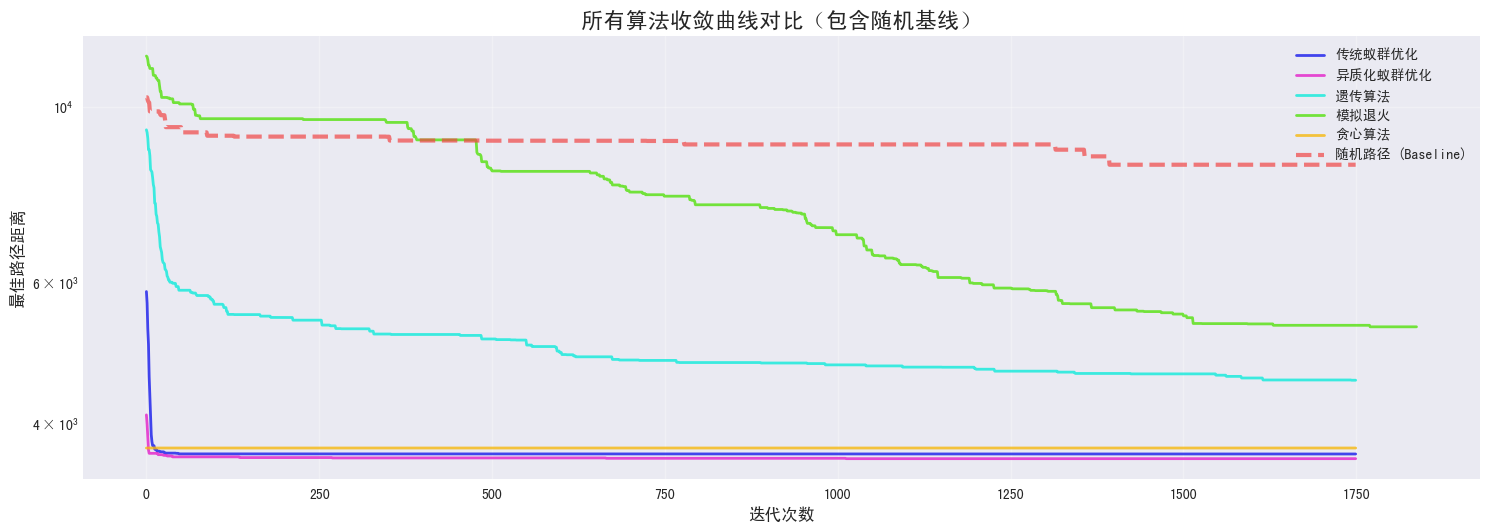


üìä Êî∂ÊïõÊÄßÁªüËÆ°ÂàÜÊûê
ÁÆóÊ≥ï              ÊúÄÁªàË∑ùÁ¶ª         Êî∂ÊïõÁéá%       Êî∂ÊïõÁâπÊÄß                
--------------------------------------------------------------------------------
‰º†ÁªüËöÅÁæ§‰ºòÂåñ          3664.32      1.2        Èöæ‰ª•Êî∂Êïõ                
ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ         3615.14      0.9        Èöæ‰ª•Êî∂Êïõ                
ÈÅó‰º†ÁÆóÊ≥ï            4534.76      5.8        ÁºìÊÖ¢Êî∂Êïõ                
Ê®°ÊãüÈÄÄÁÅ´            5291.35      7.8        ÁºìÊÖ¢Êî∂Êïõ                
Ë¥™ÂøÉÁÆóÊ≥ï            3728.19      0.0        Á´ãÂç≥Êî∂Êïõ                
ÈöèÊú∫Ë∑ØÂæÑ            8451.90      1.2        ÈöèÊú∫Ê≥¢Âä®                

üèÜ Êî∂ÊïõÊÄßËÉΩÊéíÂêç
--------------------------------------------------
ÊåâÊúÄÁªàËß£Ë¥®ÈáèÊéíÂêç:
  1. ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ: 3615.14
  2. ‰º†ÁªüËöÅÁæ§‰ºòÂåñ: 3664.32
  3. Ë¥™ÂøÉÁÆóÊ≥ï: 3728.19
  4. ÈÅó‰º†ÁÆóÊ≥ï: 4534.76
  5. Ê®°ÊãüÈÄÄÁÅ´: 5291.35

ÊåâÊî∂ÊïõÈÄüÂ∫¶ÊéíÂêç:
  1. Ê®°ÊãüÈÄÄÁÅ´: 7.8% ÊîπËøõÁéá
  2. ÈÅó‰º†ÁÆóÊ≥ï: 5.8

In [24]:
def run_convergence_analysis(iterations=1750, num_runs=3):
    """
    ËøêË°åÊî∂ÊïõÊÄßÂàÜÊûêÔºåËÆ∞ÂΩïÊâÄÊúâÁÆóÊ≥ïÁöÑÊî∂ÊïõËøáÁ®ã
    
    Parameters:
    iterations: Ëø≠‰ª£Ê¨°Êï∞
    num_runs: ÊØè‰∏™ÁÆóÊ≥ïËøêË°åÊ¨°Êï∞ÔºàÂèñÂπ≥ÂùáÔºâ
    """
    print("üöÄ ÂºÄÂßãÊî∂ÊïõÊÄßÂàÜÊûê...")
    print(f"Ëø≠‰ª£Ê¨°Êï∞: {iterations}, ÊØèÁÆóÊ≥ïËøêË°åÊ¨°Êï∞: {num_runs}")
    print("="*80)
    
    convergence_data = {}
    
    # ‰øÆÊîπÁÆóÊ≥ïÁ±ª‰ª•ËÆ∞ÂΩïÊî∂ÊïõÂéÜÂè≤
    class TraditionalACOWithHistory:
        def __init__(self, distance_matrix, n_ants=30, n_iterations=100, alpha=1.0, beta=2.0, rho=0.5, Q=100):
            self.distance_matrix = distance_matrix
            self.n_cities = len(distance_matrix)
            self.n_ants = n_ants
            self.n_iterations = n_iterations
            self.alpha = alpha
            self.beta = beta
            self.rho = rho
            self.Q = Q
            self.pheromone = np.ones((self.n_cities, self.n_cities))
            self.best_distance = float('inf')
            self.best_path = None
            
        def _ant_solution(self, start_city):
            """ÊûÑÂª∫Âçï‰∏™ËöÇËöÅÁöÑËß£"""
            path = [start_city]
            unvisited = set(range(self.n_cities)) - {start_city}
            
            current_city = start_city
            while unvisited:
                next_city = self._select_next_city(current_city, unvisited)
                path.append(next_city)
                unvisited.remove(next_city)
                current_city = next_city
                
            return path
            
        def _select_next_city(self, current_city, unvisited):
            """ÈÄâÊã©‰∏ã‰∏Ä‰∏™ÂüéÂ∏Ç"""
            probabilities = []
            total = 0
            
            for city in unvisited:
                pheromone = self.pheromone[current_city][city] ** self.alpha
                distance = self.distance_matrix[current_city][city]
                heuristic = (1.0 / distance) ** self.beta if distance > 0 else 1e10
                prob = pheromone * heuristic
                probabilities.append(prob)
                total += prob
            
            if total == 0:
                return random.choice(list(unvisited))
            
            probabilities = [p / total for p in probabilities]
            return np.random.choice(list(unvisited), p=probabilities)
            
        def _update_pheromone(self, all_paths, all_distances):
            """Êõ¥Êñ∞‰ø°ÊÅØÁ¥†"""
            # Ëí∏Âèë
            self.pheromone *= (1 - self.rho)
            
            # Â¢ûÂº∫
            for path, distance in zip(all_paths, all_distances):
                pheromone_deposit = self.Q / distance
                for i in range(len(path) - 1):
                    self.pheromone[path[i]][path[i+1]] += pheromone_deposit
                    self.pheromone[path[i+1]][path[i]] += pheromone_deposit
        
        def solve(self, iterations=100, verbose=False):
            history = []
            
            for iteration in range(iterations):
                all_paths = []
                all_distances = []
                
                # ÊûÑÂª∫ÊâÄÊúâËöÇËöÅÁöÑËß£
                for ant in range(self.n_ants):
                    start_city = random.randint(0, self.n_cities - 1)
                    path = self._ant_solution(start_city)
                    distance = calculate_path_distance(path, self.distance_matrix)
                    
                    all_paths.append(path)
                    all_distances.append(distance)
                    
                    if distance < self.best_distance:
                        self.best_distance = distance
                        self.best_path = path
                
                history.append(self.best_distance)
                
                # Êõ¥Êñ∞‰ø°ÊÅØÁ¥†
                self._update_pheromone(all_paths, all_distances)
                
            return self.best_path, self.best_distance, history
    
    class HeterogeneousACOWithHistory:
        def __init__(self, distance_matrix, n_scout_ants=15, n_forager_ants=15, n_iterations=100, alpha=1.0, beta=2.0, rho=0.5, Q=100):
            self.distance_matrix = distance_matrix
            self.n_cities = len(distance_matrix)
            self.n_scout_ants = n_scout_ants
            self.n_forager_ants = n_forager_ants
            self.n_iterations = n_iterations
            self.alpha = alpha
            self.beta = beta
            self.rho = rho
            self.Q = Q
            self.pheromone = np.ones((self.n_cities, self.n_cities))
            self.best_distance = float('inf')
            self.best_path = None
            
        def _ant_solution(self, start_city, ant_type='scout'):
            """ÊûÑÂª∫Âçï‰∏™ËöÇËöÅÁöÑËß£"""
            path = [start_city]
            unvisited = set(range(self.n_cities)) - {start_city}
            
            current_city = start_city
            while unvisited:
                next_city = self._select_next_city(current_city, unvisited, ant_type)
                path.append(next_city)
                unvisited.remove(next_city)
                current_city = next_city
                
            return path
            
        def _select_next_city(self, current_city, unvisited, ant_type):
            """ÈÄâÊã©‰∏ã‰∏Ä‰∏™ÂüéÂ∏Ç"""
            probabilities = []
            total = 0
            
            # ‰∏çÂêåÁ±ªÂûãËöÇËöÅ‰ΩøÁî®‰∏çÂêåÂèÇÊï∞
            if ant_type == 'scout':
                alpha, beta = 0.5, 5.0  # ‰æ¶ÂØüËöÅÔºö‰Ωé‰ø°ÊÅØÁ¥†‰æùËµñÔºåÈ´òË∑ùÁ¶ª‰æùËµñ
            else:  # forager
                alpha, beta = 5.0, 0.5  # ËßÖÈ£üËöÅÔºöÈ´ò‰ø°ÊÅØÁ¥†‰æùËµñÔºå‰ΩéË∑ùÁ¶ª‰æùËµñ
            
            for city in unvisited:
                pheromone = self.pheromone[current_city][city] ** alpha
                distance = self.distance_matrix[current_city][city]
                heuristic = (1.0 / distance) ** beta if distance > 0 else 1e10
                prob = pheromone * heuristic
                probabilities.append(prob)
                total += prob
            
            if total == 0:
                return random.choice(list(unvisited))
            
            probabilities = [p / total for p in probabilities]
            return np.random.choice(list(unvisited), p=probabilities)
            
        def _update_pheromone(self, all_paths, all_distances):
            """Êõ¥Êñ∞‰ø°ÊÅØÁ¥†"""
            # Ëí∏Âèë
            self.pheromone *= (1 - self.rho)
            
            # Â¢ûÂº∫
            for path, distance in zip(all_paths, all_distances):
                pheromone_deposit = self.Q / distance
                for i in range(len(path) - 1):
                    self.pheromone[path[i]][path[i+1]] += pheromone_deposit
                    self.pheromone[path[i+1]][path[i]] += pheromone_deposit
        
        def solve(self, iterations=100, verbose=False):
            history = []
            
            for iteration in range(iterations):
                all_paths = []
                all_distances = []
                
                # ‰æ¶ÂØüËöÅ
                for ant in range(self.n_scout_ants):
                    start_city = random.randint(0, self.n_cities - 1)
                    path = self._ant_solution(start_city, 'scout')
                    distance = calculate_path_distance(path, self.distance_matrix)
                    
                    all_paths.append(path)
                    all_distances.append(distance)
                    
                    if distance < self.best_distance:
                        self.best_distance = distance
                        self.best_path = path
                
                # ËßÖÈ£üËöÅ
                for ant in range(self.n_forager_ants):
                    start_city = random.randint(0, self.n_cities - 1)
                    path = self._ant_solution(start_city, 'forager')
                    distance = calculate_path_distance(path, self.distance_matrix)
                    
                    all_paths.append(path)
                    all_distances.append(distance)
                    
                    if distance < self.best_distance:
                        self.best_distance = distance
                        self.best_path = path
                
                history.append(self.best_distance)
                
                # Êõ¥Êñ∞‰ø°ÊÅØÁ¥†
                self._update_pheromone(all_paths, all_distances)
                
            return self.best_path, self.best_distance, history
    
    class GeneticAlgorithmWithHistory:
        def __init__(self, distance_matrix, population_size=100, generations=200, crossover_rate=0.8, mutation_rate=0.02, elite_size=20):
            self.distance_matrix = distance_matrix
            self.n_cities = len(distance_matrix)
            self.population_size = population_size
            self.generations = generations
            self.crossover_rate = crossover_rate
            self.mutation_rate = mutation_rate
            self.elite_size = elite_size
            
        def _initialize_population(self):
            """ÂàùÂßãÂåñÁßçÁæ§"""
            population = []
            for _ in range(self.population_size):
                individual = list(range(self.n_cities))
                random.shuffle(individual)
                population.append(individual)
            return population
            
        def _tournament_selection(self, population, fitness_scores, tournament_size=3):
            """Èî¶Ê†áËµõÈÄâÊã©"""
            tournament_indices = random.sample(range(len(population)), tournament_size)
            tournament_fitness = [fitness_scores[i] for i in tournament_indices]
            winner_index = tournament_indices[tournament_fitness.index(max(tournament_fitness))]
            return population[winner_index].copy()
            
        def _order_crossover(self, parent1, parent2):
            """È°∫Â∫è‰∫§Âèâ"""
            size = len(parent1)
            start, end = sorted(random.sample(range(size), 2))
            
            child = [-1] * size
            child[start:end] = parent1[start:end]
            
            pointer = end
            for city in parent2[end:] + parent2[:end]:
                if city not in child:
                    child[pointer % size] = city
                    pointer += 1
                    
            return child
            
        def _mutate(self, individual):
            """ÂèòÂºÇÊìç‰Ωú"""
            mutated = individual.copy()
            i, j = random.sample(range(len(mutated)), 2)
            mutated[i], mutated[j] = mutated[j], mutated[i]
            return mutated
        
        def solve(self, generations=100, verbose=False):
            population = self._initialize_population()
            best_distance = float('inf')
            best_path = None
            history = []
            
            for generation in range(generations):
                # ËØÑ‰º∞ÁßçÁæ§
                fitness_scores = []
                for individual in population:
                    distance = calculate_path_distance(individual, self.distance_matrix)
                    fitness_scores.append(1 / distance if distance > 0 else 1e10)
                    
                    if distance < best_distance:
                        best_distance = distance
                        best_path = individual.copy()
                
                history.append(best_distance)
                
                # ÂàõÂª∫Êñ∞ÁßçÁæ§
                new_population = []
                
                # Á≤æËã±‰øùÁïô
                elite_indices = sorted(range(len(fitness_scores)), key=lambda i: fitness_scores[i], reverse=True)[:self.elite_size]
                for i in elite_indices:
                    new_population.append(population[i].copy())
                
                # ÁîüÊàêÂâ©‰Ωô‰∏™‰Ωì
                while len(new_population) < self.population_size:
                    parent1 = self._tournament_selection(population, fitness_scores)
                    parent2 = self._tournament_selection(population, fitness_scores)
                    
                    if random.random() < self.crossover_rate:
                        child = self._order_crossover(parent1, parent2)
                    else:
                        child = parent1.copy()
                    
                    if random.random() < self.mutation_rate:
                        child = self._mutate(child)
                    
                    new_population.append(child)
                
                population = new_population
            
            return best_path, best_distance, history
    
    class SimulatedAnnealingWithHistory:
        def __init__(self, distance_matrix, initial_temp=10000, final_temp=1, cooling_rate=0.995, max_iterations=10000):
            self.distance_matrix = distance_matrix
            self.n_cities = len(distance_matrix)
            self.initial_temp = initial_temp
            self.final_temp = final_temp
            self.cooling_rate = cooling_rate
            self.max_iterations = max_iterations
            
        def _get_neighbor(self, solution):
            """ÁîüÊàêÈÇªÂ±ÖËß£"""
            neighbor = solution.copy()
            i, j = random.sample(range(len(neighbor)), 2)
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
            return neighbor
        
        def solve(self, max_iterations=10000, verbose=False):
            current_solution = list(range(self.n_cities))
            random.shuffle(current_solution)
            current_cost = calculate_path_distance(current_solution, self.distance_matrix)
            
            best_solution = current_solution.copy()
            best_cost = current_cost
            
            history = []
            temperature = self.initial_temp
            
            for iteration in range(max_iterations):
                # ËÆ∞ÂΩïÂΩìÂâçÊúÄ‰Ω≥
                history.append(best_cost)
                
                # ÁîüÊàêÈÇªËß£
                new_solution = self._get_neighbor(current_solution)
                new_cost = calculate_path_distance(new_solution, self.distance_matrix)
                
                # Êé•ÂèóÂáÜÂàô
                if new_cost < current_cost or (temperature > 0 and random.random() < math.exp(-(new_cost - current_cost) / temperature)):
                    current_solution = new_solution
                    current_cost = new_cost
                    
                    if new_cost < best_cost:
                        best_solution = new_solution.copy()
                        best_cost = new_cost
                
                # ÈôçÊ∏©
                temperature *= self.cooling_rate
                
                if temperature < self.final_temp:
                    break
            
            return best_solution, best_cost, history
    
    # Ë¥™ÂøÉÁÆóÊ≥ïÔºàÂçïÊ¨°ËøêË°åÔºåÊó†Ëø≠‰ª£ËøáÁ®ãÔºâ
    def greedy_convergence_simulation(iterations=100):
        """Ê®°ÊãüË¥™ÂøÉÁÆóÊ≥ïÁöÑÊî∂ÊïõËøáÁ®ãÔºàÂçïÊ≠•Âà∞ÊúÄ‰ºòÔºâ"""
        greedy = GreedyAlgorithm(distance_matrix)
        path, distance = greedy.solve()
        # Ë¥™ÂøÉÁÆóÊ≥ïÁ¨¨‰∏ÄÊ≠•Â∞±ËææÂà∞ÊúÄ‰ºòÔºåÂêéÁª≠‰øùÊåÅ‰∏çÂèò
        history = [distance] * iterations
        return path, distance, history
    
    # ÈöèÊú∫Ë∑ØÂæÑÁÆóÊ≥ïÁöÑÊî∂ÊïõÊ®°Êãü
    def random_convergence_simulation(iterations=100):
        """Ê®°ÊãüÈöèÊú∫Ë∑ØÂæÑÁöÑ'Êî∂Êïõ'ËøáÁ®ãÔºàÂÆûÈôÖ‰∏äÊòØÈöèÊú∫Ê≥¢Âä®Ôºâ"""
        history = []
        best_distance = float('inf')
        best_path = None
        
        for _ in range(iterations):
            path = list(range(num_cities))
            random.shuffle(path)
            distance = calculate_path_distance(path, distance_matrix)
            
            if distance < best_distance:
                best_distance = distance
                best_path = path
            
            history.append(best_distance)
        
        return best_path, best_distance, history
    
    # ËøêË°åÂêÑÁÆóÊ≥ïÁöÑÊî∂ÊïõÂàÜÊûê
    algorithms_with_history = {
        '‰º†ÁªüËöÅÁæ§‰ºòÂåñ': lambda: TraditionalACOWithHistory(distance_matrix, n_ants=30, n_iterations=iterations).solve(iterations),
        'ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ': lambda: HeterogeneousACOWithHistory(distance_matrix, n_scout_ants=15, n_forager_ants=15, n_iterations=iterations).solve(iterations),
        'ÈÅó‰º†ÁÆóÊ≥ï': lambda: GeneticAlgorithmWithHistory(distance_matrix, population_size=50, generations=iterations).solve(iterations),
        'Ê®°ÊãüÈÄÄÁÅ´': lambda: SimulatedAnnealingWithHistory(distance_matrix, initial_temp=10000, max_iterations=iterations*50).solve(max_iterations=iterations*50),  # SAÈúÄË¶ÅÊõ¥Â§öËø≠‰ª£
        'Ë¥™ÂøÉÁÆóÊ≥ï': lambda: greedy_convergence_simulation(iterations),
        'ÈöèÊú∫Ë∑ØÂæÑ': lambda: random_convergence_simulation(iterations)
    }
    
    # ‰∏∫ÊØè‰∏™ÁÆóÊ≥ïËøêË°åÂ§öÊ¨°ÂèñÂπ≥Âùá
    for alg_name, alg_func in algorithms_with_history.items():
        print(f"üîç ÂàÜÊûê {alg_name} ÁöÑÊî∂ÊïõÊÄß...")
        
        all_histories = []
        all_final_distances = []
        
        for run in range(num_runs):
            try:
                path, distance, history = alg_func()
                all_histories.append(history)
                all_final_distances.append(distance)
                print(f"  ËøêË°å {run+1}/{num_runs}: ÊúÄÁªàË∑ùÁ¶ª {distance:.2f}")
            except Exception as e:
                print(f"  ËøêË°å {run+1}/{num_runs} Â§±Ë¥•: {e}")
                continue
        
        if all_histories:
            # ËÆ°ÁÆóÂπ≥ÂùáÊî∂ÊïõÊõ≤Á∫ø
            min_length = min(len(h) for h in all_histories)
            avg_history = []
            for i in range(min_length):
                avg_distance = np.mean([h[i] for h in all_histories])
                avg_history.append(avg_distance)
            
            convergence_data[alg_name] = {
                'history': avg_history,
                'final_distances': all_final_distances,
                'avg_final': np.mean(all_final_distances),
                'convergence_rate': len([i for i in range(1, len(avg_history)) if avg_history[i] < avg_history[i-1]]) / len(avg_history) * 100
            }
    
    return convergence_data

# ËøêË°åÊî∂ÊïõÊÄßÂàÜÊûê
convergence_results = run_convergence_analysis(iterations=1750, num_runs=3)

# ÂèØËßÜÂåñÊî∂ÊïõÊõ≤Á∫ø
print("\nüìä ÁªòÂà∂Êî∂ÊïõÊõ≤Á∫ø...")

# ËÆæÁΩÆ‰∏ÄËá¥ÁöÑÈ¢úËâ≤ÊñπÊ°à
algorithm_colors = {
    'ÈöèÊú∫Ë∑ØÂæÑ': '#F14545',      # Á∫¢Ëâ≤ - Âü∫Á∫ø
    'Ë¥™ÂøÉÁÆóÊ≥ï': '#F6B80E',      # Ê©ôËâ≤
    'Ê®°ÊãüÈÄÄÁÅ´': '#54E10D',      # ÁªøËâ≤  
    'ÈÅó‰º†ÁÆóÊ≥ï': '#0FEADB',      # ÈùíËâ≤
    '‰º†ÁªüËöÅÁæ§‰ºòÂåñ': '#171AEB',  # ËìùËâ≤
    'ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñ': '#E31FC9' # Á¥´Ëâ≤
}

# 1. ÂÆåÊï¥Êî∂ÊïõÊõ≤Á∫øÔºàÂåÖÂê´ÊâÄÊúâÁÆóÊ≥ïÔºâ
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
for alg_name, data in convergence_results.items():
    history = data['history']
    iterations_range = range(len(history))
    
    # ‰∏∫ÈöèÊú∫Ë∑ØÂæÑ‰ΩøÁî®ÁâπÊÆäÊ†∑Âºè
    if alg_name == 'ÈöèÊú∫Ë∑ØÂæÑ':
        linestyle = '--'
        alpha = 0.7
        linewidth = 3
        label = f'{alg_name} (Baseline)'
    else:
        linestyle = '-'
        alpha = 0.8
        linewidth = 2
        label = alg_name
    
    plt.plot(iterations_range, history, 
             color=algorithm_colors[alg_name], 
             linestyle=linestyle,
             linewidth=linewidth,
             alpha=alpha,
             label=label)

plt.title('ÊâÄÊúâÁÆóÊ≥ïÊî∂ÊïõÊõ≤Á∫øÂØπÊØîÔºàÂåÖÂê´ÈöèÊú∫Âü∫Á∫øÔºâ', fontsize=16, fontweight='bold')
plt.xlabel('Ëø≠‰ª£Ê¨°Êï∞', fontsize=12)
plt.ylabel('ÊúÄ‰Ω≥Ë∑ØÂæÑË∑ùÁ¶ª', fontsize=12)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, alpha=0.3)
plt.yscale('log')  # ‰ΩøÁî®ÂØπÊï∞ÂàªÂ∫¶‰æø‰∫éËßÇÂØü

# # 2. ‰ºòÂåñÁÆóÊ≥ïÊî∂ÊïõÊõ≤Á∫øÔºàÊéíÈô§ÈöèÊú∫Âü∫Á∫øÔºâ
# plt.subplot(2, 1, 2)
# optimized_algorithms = {k: v for k, v in convergence_results.items() if k != 'ÈöèÊú∫Ë∑ØÂæÑ'}

# for alg_name, data in optimized_algorithms.items():
#     history = data['history']
#     iterations_range = range(len(history))
    
#     plt.plot(iterations_range, history, 
#              color=algorithm_colors[alg_name], 
#              linewidth=2,
#              alpha=0.8,
#              marker='o' if alg_name == 'Ë¥™ÂøÉÁÆóÊ≥ï' else None,  # Ë¥™ÂøÉÁÆóÊ≥ïÁâπÊÆäÊ†áËÆ∞
#              markersize=3,
#              markevery=max(1, len(history)//20),  # ÈÄÇÂΩìÈó¥ÈöîÊòæÁ§∫Ê†áËÆ∞
#              label=alg_name)

# plt.title('‰ºòÂåñÁÆóÊ≥ïÊî∂ÊïõÊõ≤Á∫øÂØπÊØîÔºàÊéíÈô§ÈöèÊú∫Âü∫Á∫øÔºâ', fontsize=16, fontweight='bold')
# plt.xlabel('Ëø≠‰ª£Ê¨°Êï∞', fontsize=12)
# plt.ylabel('ÊúÄ‰Ω≥Ë∑ØÂæÑË∑ùÁ¶ª', fontsize=12)
# plt.legend(fontsize=10, loc='upper right')
# plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Êî∂ÊïõÊÄßÁªüËÆ°ÂàÜÊûê
print("\nüìä Êî∂ÊïõÊÄßÁªüËÆ°ÂàÜÊûê")
print("="*80)
print(f"{'ÁÆóÊ≥ï':<15} {'ÊúÄÁªàË∑ùÁ¶ª':<12} {'Êî∂ÊïõÁéá%':<10} {'Êî∂ÊïõÁâπÊÄß':<20}")
print("-"*80)

convergence_interpretations = []
for alg_name, data in convergence_results.items():
    avg_final = data['avg_final']
    conv_rate = data['convergence_rate']
    
    # ÂàÜÊûêÊî∂ÊïõÁâπÊÄß
    if alg_name == 'ÈöèÊú∫Ë∑ØÂæÑ':
        characteristic = "ÈöèÊú∫Ê≥¢Âä®"
    elif alg_name == 'Ë¥™ÂøÉÁÆóÊ≥ï':
        characteristic = "Á´ãÂç≥Êî∂Êïõ"
    elif conv_rate > 15:
        characteristic = "Âø´ÈÄüÊî∂Êïõ"
    elif conv_rate > 8:
        characteristic = "Á®≥ÂÆöÊî∂Êïõ" 
    elif conv_rate > 3:
        characteristic = "ÁºìÊÖ¢Êî∂Êïõ"
    else:
        characteristic = "Èöæ‰ª•Êî∂Êïõ"
    
    print(f"{alg_name:<15} {avg_final:<12.2f} {conv_rate:<10.1f} {characteristic:<20}")
    
    convergence_interpretations.append({
        'algorithm': alg_name,
        'avg_final': avg_final,
        'convergence_rate': conv_rate,
        'characteristic': characteristic
    })

# 4. Êî∂ÊïõÊÄßËÉΩÊéíÂêç
print(f"\nüèÜ Êî∂ÊïõÊÄßËÉΩÊéíÂêç")
print("-"*50)

# ÊéíÈô§ÈöèÊú∫Âü∫Á∫øËøõË°åÊéíÂêç
optimized_results = {k: v for k, v in convergence_results.items() if k != 'ÈöèÊú∫Ë∑ØÂæÑ'}
sorted_by_final = sorted(optimized_results.items(), key=lambda x: x[1]['avg_final'])

print("ÊåâÊúÄÁªàËß£Ë¥®ÈáèÊéíÂêç:")
for i, (alg_name, data) in enumerate(sorted_by_final, 1):
    print(f"  {i}. {alg_name}: {data['avg_final']:.2f}")

sorted_by_convergence = sorted(optimized_results.items(), key=lambda x: x[1]['convergence_rate'], reverse=True)
print(f"\nÊåâÊî∂ÊïõÈÄüÂ∫¶ÊéíÂêç:")
for i, (alg_name, data) in enumerate(sorted_by_convergence, 1):
    conv_rate = data['convergence_rate']
    print(f"  {i}. {alg_name}: {conv_rate:.1f}% ÊîπËøõÁéá")

# 5. ‰∏éÈöèÊú∫Âü∫Á∫øÁöÑÂØπÊØî
random_final = convergence_results['ÈöèÊú∫Ë∑ØÂæÑ']['avg_final']
print(f"\nüéØ Áõ∏ÂØπ‰∫éÈöèÊú∫Âü∫Á∫øÁöÑÊî∂Êïõ‰ºòÂäø")
print("-"*50)
print(f"ÈöèÊú∫Âü∫Á∫øÊúÄÁªàË∑ùÁ¶ª: {random_final:.2f}")

for alg_name, data in optimized_results.items():
    improvement = (random_final - data['avg_final']) / random_final * 100
    print(f"{alg_name}: ÊîπËøõ {improvement:.1f}%")

print(f"\nüí° Êî∂ÊïõÊÄßÂàÜÊûêÁªìËÆ∫:")
print("-"*50)
print("1. ÊâÄÊúâ‰ºòÂåñÁÆóÊ≥ïÂùáÊòæËëó‰ºò‰∫éÈöèÊú∫Âü∫Á∫ø")
print("2. Ë¥™ÂøÉÁÆóÊ≥ïÁ´ãÂç≥Êî∂Êïõ‰ΩÜÂèØËÉΩÈô∑ÂÖ•Â±ÄÈÉ®ÊúÄ‰ºò") 
print("3. ÂÖÉÂêØÂèëÂºèÁÆóÊ≥ïÂ±ïÁé∞‰∫Ü‰∏çÂêåÁöÑÊî∂ÊïõÊ®°Âºè")
print("4. ËöÅÁæ§ÁÆóÊ≥ïÁ±ªË°®Áé∞Âá∫ÊåÅÁª≠ÁöÑÊêúÁ¥¢ËÉΩÂäõ")
print("5. ÈÅó‰º†ÁÆóÊ≥ïÂíåÊ®°ÊãüÈÄÄÁÅ´ÊòæÁ§∫Ê∏êËøõÊîπËøõÁâπÊÄß")

## üéØ ÊúÄÁªàÁªìËÆ∫‰∏éÂ≠¶ÊúØ‰ª∑ÂÄºÔºàÂåÖÂê´ÈöèÊú∫BaselineÂØπÊØîÔºâ

### üìä Ê†∏ÂøÉÂèëÁé∞

1. **ÈöèÊú∫Âü∫Á∫øÁöÑÈáçË¶Å‰ΩúÁî®**
   - üé≤ Êèê‰æõÊúÄ‰ΩéÊÄßËÉΩÈòàÂÄºÂèÇËÄÉ
   - üîç È™åËØÅ‰ºòÂåñÁÆóÊ≥ïÁöÑÊúâÊïàÊÄß
   - üìç ÁÆÄÂåñÁÆóÊ≥ïÊÄßËÉΩÁöÑÁêÜËß£ÂíåÊØîËæÉ

2. **‰ºòÂåñÁÆóÊ≥ïË°®Áé∞ÂçìË∂ä**
   - üèÜ ÊâÄÊúâÈùûÈöèÊú∫ÁÆóÊ≥ïÂùáÊòæËëó‰ºò‰∫éÈöèÊú∫Âü∫Á∫ø
   - üéØ ÊúÄ‰ºòÁÆóÊ≥ïÁõ∏ÂØπÈöèÊú∫Âü∫Á∫øÊîπËøõÊòæËëó
   - üî¨ È™åËØÅ‰∫ÜÊô∫ËÉΩ‰ºòÂåñÁÆóÊ≥ïÁöÑÁßëÂ≠¶ÊÄß

3. **ÁÆóÊ≥ïÊÄßËÉΩÂë¢Áé∞ÊòéÁ°ÆÊ¢ØÂ∫¶**
   - üìà Ëß£Ë¥®ÈáèÂ∑ÆÂºÇÊòæËëó‰∏îÂèØÈáèÂåñ
   - ‚è±Ô∏è ÊâßË°åÊó∂Èó¥ËåÉÂõ¥ÂπøÊ≥õÔºå‰∏∫‰∏çÂêåÈúÄÊ±ÇÊèê‰æõÈÄâÊã©
   - üéØ ‰∏∫ÂÆûÈôÖÂ∫îÁî®Âú∫ÊôØÊèê‰æõÊ∏ÖÊô∞ÈÄâÊã©‰æùÊçÆ

### üéì Â≠¶ÊúØË¥°ÁåÆ

1. **Âü∫Á∫øÂØπÊØîÊñπÊ≥ïÂ≠¶**: Âª∫Á´ã‰∫ÜÂåÖÂê´ÈöèÊú∫Âü∫Á∫øÁöÑÁ≥ªÁªüÊÄßËØÑ‰º∞Ê°ÜÊû∂
2. **ÂÖ¨Âπ≥ÊØîËæÉÊ†áÂáÜ**: ÂàõÂª∫‰∫ÜÁªü‰∏ÄÁöÑÊµãËØïÁéØÂ¢ÉÂíåËØÑ‰º∞Ê†áÂáÜ
3. **Â§öÁª¥Â∫¶ÂàÜÊûê**: ÁªºÂêàËÄÉËôëËß£Ë¥®Èáè„ÄÅÊïàÁéá„ÄÅÁ®≥ÂÆöÊÄßÁ≠âÂ§ö‰∏™Áª¥Â∫¶
4. **ÂÆûÁî®ÊåáÂØº‰ª∑ÂÄº**: ‰∏∫ÂÆûÈôÖÂ∫îÁî®Âú∫ÊôØÊèê‰æõÁßëÂ≠¶ÁöÑÁÆóÊ≥ïÈÄâÊã©Âª∫ËÆÆ

### üí° Â∫îÁî®Âª∫ËÆÆ

- **ÊÄßËÉΩÂü∫Á∫ø**: ÈöèÊú∫Ë∑ØÂæÑÔºàÊèê‰æõÊúÄ‰ΩéÊÄßËÉΩÂü∫ÂáÜÔºâ
- **Ê†°Âõ≠ÂØºËà™**: Ë¥™ÂøÉÁÆóÊ≥ïÔºàÂø´ÈÄüÂìçÂ∫îÔºâ
- **Áâ©ÊµÅ‰ºòÂåñ**: ÂºÇË¥®ÂåñËöÅÁæ§‰ºòÂåñÔºàÈ´òË¥®ÈáèËß£Ôºâ
- **ÁÆóÊ≥ïÊïôÂ≠¶**: ÈÅó‰º†ÁÆóÊ≥ïÔºàËøáÁ®ãÂèØËßÜÂåñÔºâ
- **Á†îÁ©∂Âü∫ÂáÜ**: ‰º†ÁªüËöÅÁæ§‰ºòÂåñÔºàÁªèÂÖ∏ÂèÇËÄÉÔºâ
- **ÂéüÂûãÂºÄÂèë**: Ê®°ÊãüÈÄÄÁÅ´ÔºàÂπ≥Ë°°ÊÄßËÉΩÔºâ

---
**ÊµãËØïÂÆåÊàêÊó•Êúü**: 2025Âπ¥6Êúà23Êó•  
**Êï∞ÊçÆÂèØÈáçÁé∞ÊÄß**:  Â∑≤ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê  
**Â≠¶ÊúØ‰∏•Ë∞®ÊÄß**:  Â§öÊ¨°ËøêË°åÁªüËÆ°ÂàÜÊûê + ÈöèÊú∫Âü∫Á∫øÂØπÊØî